### Surprise Housing, a US-based housing company has decided to enter the Australian market. The ###company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

###     Given, the company is looking at prospective properties to buy to enter the Australian market, we  Surprise Housing, a US-based housing company has decided to enter the Australian market. The  company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

###     Given, the company is looking at prospective properties to buy to enter the Australian market, we are going to build a regression model using regularization to predict the actual value of the prospective properties so that the company can use our model to decide whether it would be profitable ### to invest in them or not. 

### We will approach the given problem as per the steps below for our Analysis & Investigations. 

### 1.Data Exploration and Cleaning 

### 2.Uni, Bi and Multi-Variate analysis 

### 3.Prepare set of viable features 

### 4.Build a Model and tune it with Regularization Methods 

### 5.Present the Final Model  

 

#### ****** Necessary Imports ******

In [1459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1460]:
# Maximizing display options for better viewing
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [1461]:
#Reading the dataset
df= pd.read_csv('train.csv')

In [1462]:
#Dataset structure and contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking for columns that have Null values and the magnitude of the same per column. Columns with more than 80% of the data as null will be eliminated as they will not. be of any use to us. 

In [1463]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1464]:
# Checking for columns with Null Values more than 80%
col_Null_80=[]
for col in df.columns:
    if round((df[col].isna().sum()/len(df.index))*100,2) >=80:
        col_Null_80.append(col)

In [1465]:
# Deleting above columns
df= df.drop(df[col_Null_80], axis=1)

In [1466]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### In case of LotFrontage since most datapoints are clustered around a range, replacing with mean is the best approach

In [1467]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

#### Many fields like Fireplace, Garrage , Basement have null values because these properties dont have fireplaces, garrage or basement. We will map them as none

In [1468]:
#filling null with None
df['FireplaceQu']=df['FireplaceQu'].fillna('none')

In [1469]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}
df['FireplaceQu'] = df['FireplaceQu'].map(mapping)

#### Filling Null values with none as NA values mean no basement

In [1470]:
Bas_Col=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

for col in Bas_Col:
    if df[col].isna().sum()>0:
        df[col]=df[col].fillna('none')
    

In [1471]:
df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


#### Filling Null values with none as NA values mean no Garrage

In [1472]:
Gar_Col=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

for col in Gar_Col:
    if df[col].isna().sum()>0:
        df[col]=df[col].fillna('none')

In [1473]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#### The remaining columns have very minimal null values, hence removing the records

In [1474]:
columns_with_nulls = df.columns[df.isna().any()].tolist()

In [1475]:
columns_with_nulls

['MasVnrType', 'MasVnrArea', 'Electrical']

In [1476]:
for col in columns_with_nulls:
    df=df[~df[col].isna()]

#### All Null values have been taken care of

In [1477]:
df.isna().sum().sum()

0

#### Verifying Caategorical columns and converting to numerical where possible

#### Basement Columns

In [1478]:
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})

In [1479]:
df.BsmtExposure=df.BsmtExposure.map({'Gd':5,'Av':4,'Mn':3,'No':2,'none':0})
df.BsmtFinType1=df.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'none':0})
df.BsmtFinType2=df.BsmtFinType2.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'none':0})


#### Garrage Columns

In [1480]:
df.GarageType=df.GarageType.map({'2Types':6,'Attchd':5,'Basment':4,'BuiltIn':3,'CarPort':2,'Detchd':1,'none':0})
df.GarageFinish=df.GarageFinish.map({'Fin':3,'RFn':2,'Unf':1,'none':0})
df.GarageQual=df.GarageQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df.GarageCond=df.GarageCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})

#### Other Columns that can be converted into meaningfull numerical columns

In [1481]:
df.Street=df.Street.map({'Grvl':0,'Pave':1})
df.LotShape=df.LotShape.map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df.LandContour=df.LandContour.map({'Lvl':3,'Bnk':2,'HLS':1,'Low':0})
df.Utilities=df.Utilities.map({'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0})
df.LotConfig=df.LotConfig.map({'FR3':4,'FR2':3,'CulDSac':2,'Corner':1,'Inside':0})
df.LandSlope=df.LandSlope.map({'Gtl':2,'Mod':1,'Sev':0})
df.Condition1=df.Condition1.map({'Artery':8,'Feedr':7,'Norm':6,'RRNn':5,'RRAn':4,'PosN':3,'PosA':2,'RRNe':1,'RRAe':0})
df.Condition2=df.Condition2.map({'Artery':8,'Feedr':7,'Norm':6,'RRNn':5,'RRAn':4,'PosN':3,'PosA':2,'RRNe':1,'RRAe':0})
#df.BldgType=df.BldgType.map({'1Fam':0,'Single':1,'2FmCon':2,'Duplx':3,'TwnhsE':4,'TwnhsI':5})
df.KitchenQual=df.KitchenQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df.Functional=df.Functional.map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
df.PavedDrive=df.PavedDrive.map({'Y':2,'P':1,'N':0})

#### Verifying for Null Values after all the mapping activities

In [1482]:
df.isna().sum().sum()   

0

#### Will drop Garage year built,  as we will have the overall property age from Year Sold and Year Built, post which will be dropping them as well

In [1483]:
df=df.drop('GarageYrBlt',axis=1)

In [1484]:
df['PropAge']=df['YrSold']-df['YearBuilt']

In [1485]:
df.PropAge.describe()

count    1451.000000
mean       36.722950
std        30.238849
min         0.000000
25%         8.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: PropAge, dtype: float64

In [1486]:
df=df.drop(['YrSold', 'YearBuilt','YearRemodAdd'], axis=1)

In [1487]:
df=df.drop('MoSold',axis=1)

#### Checking the Numerical features on their spread adjusting for outliers

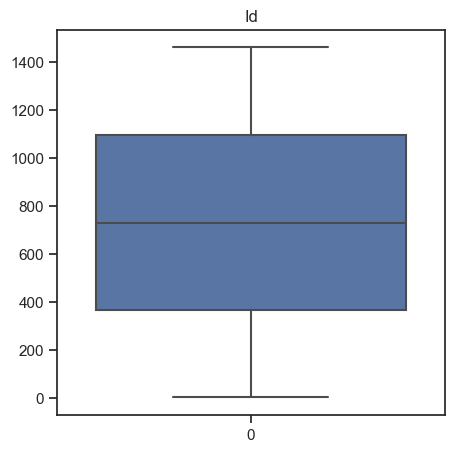

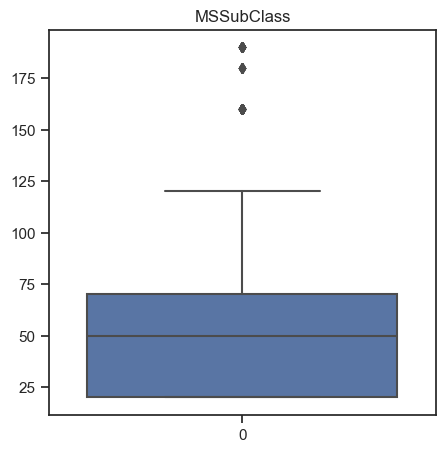

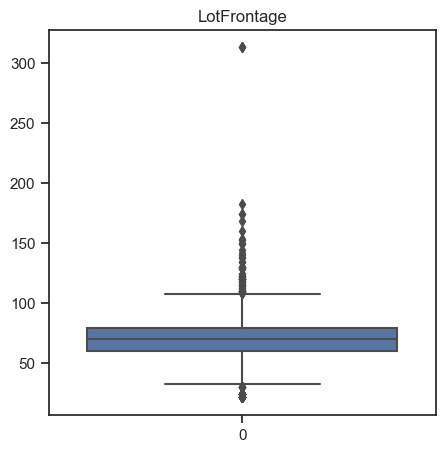

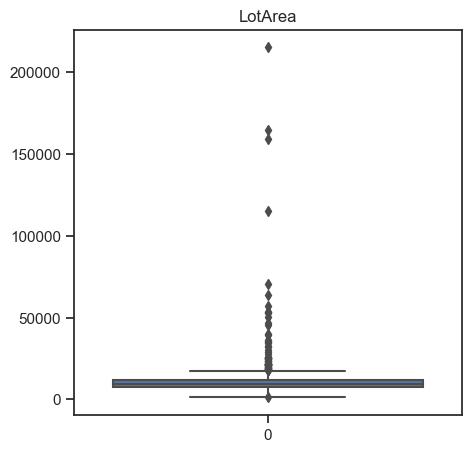

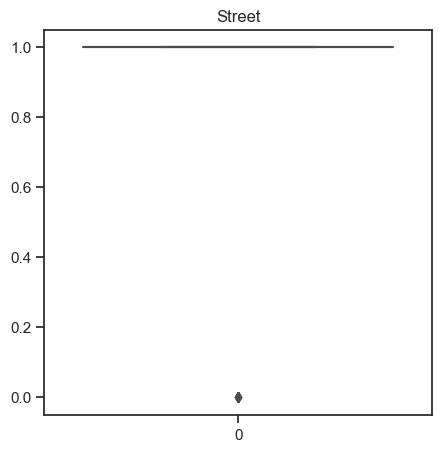

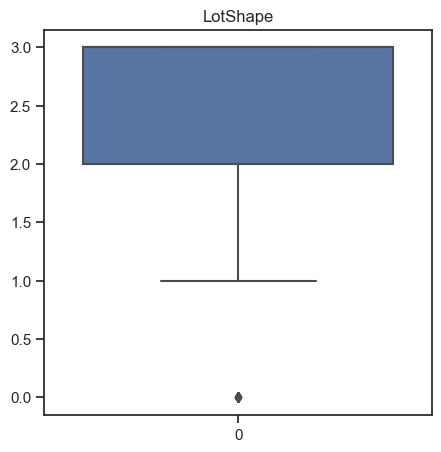

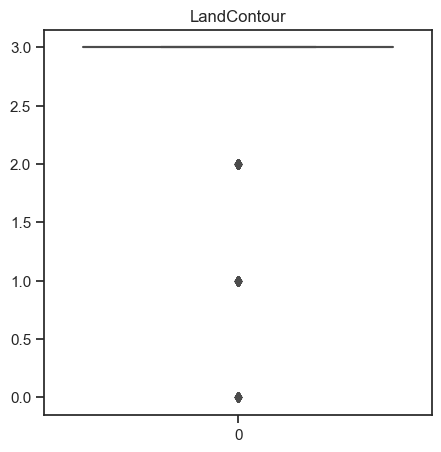

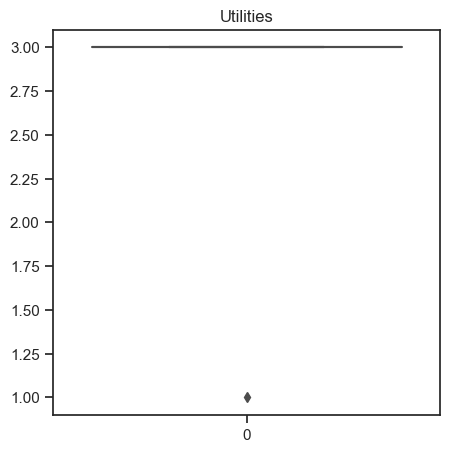

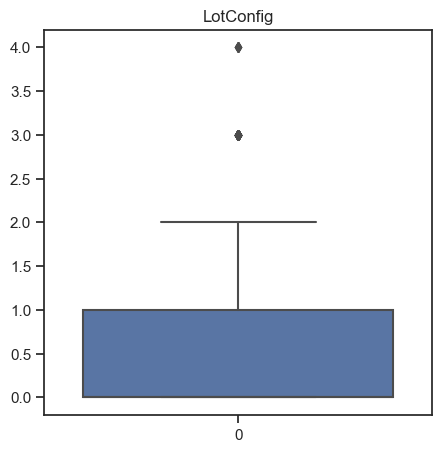

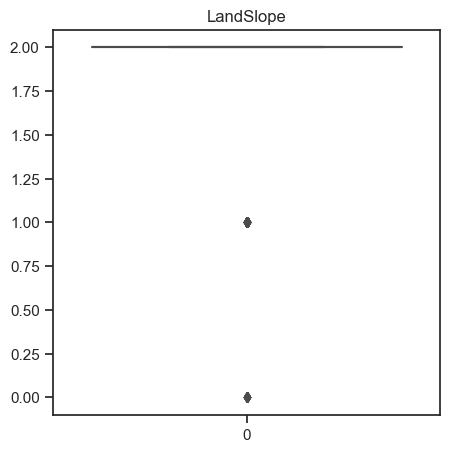

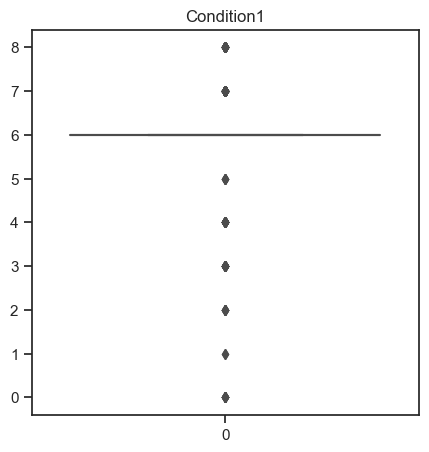

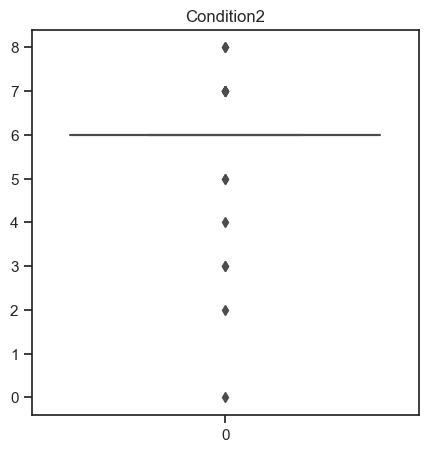

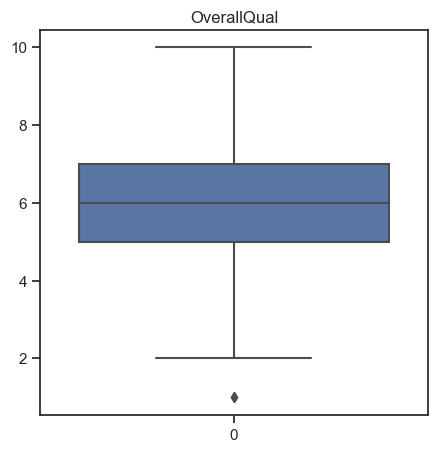

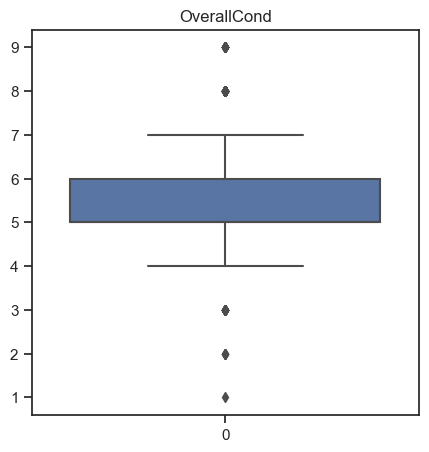

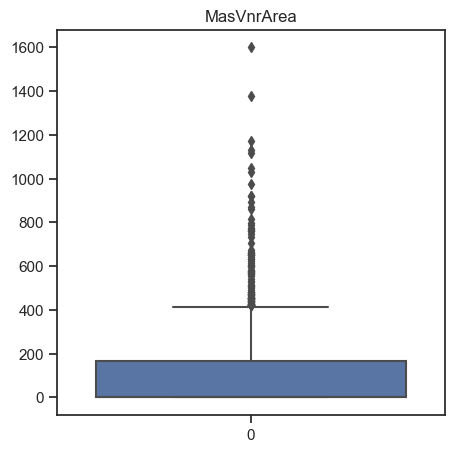

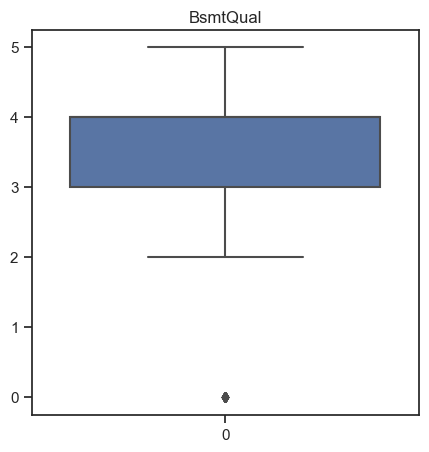

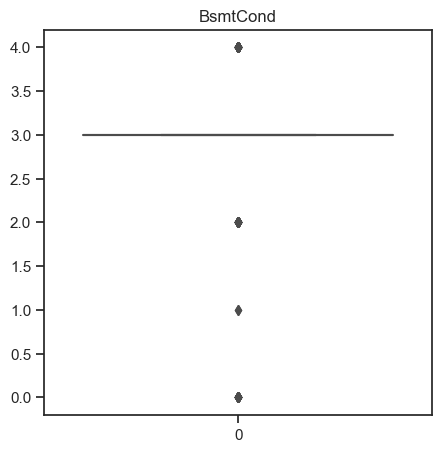

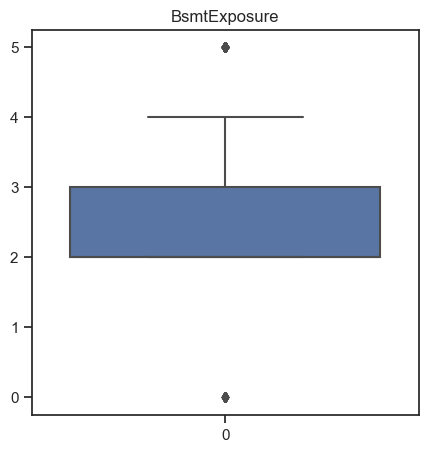

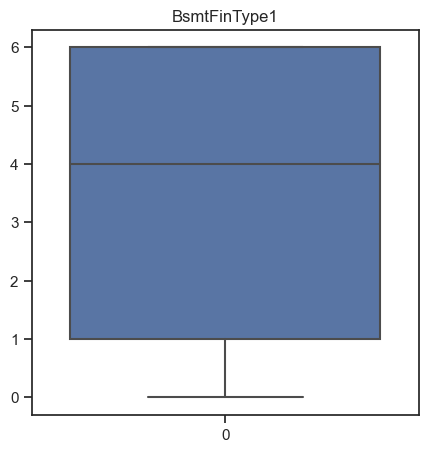

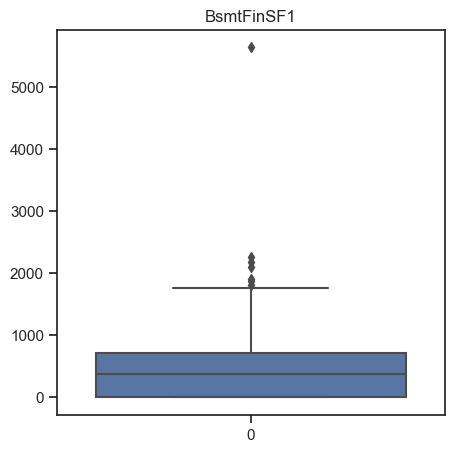

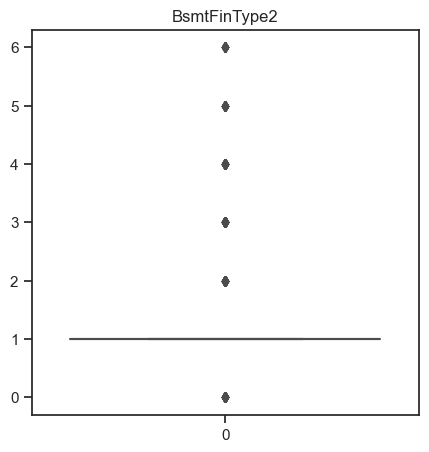

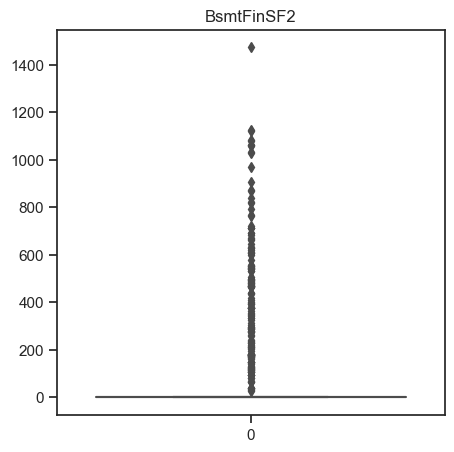

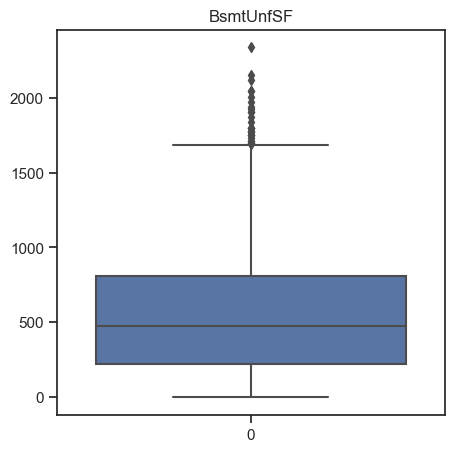

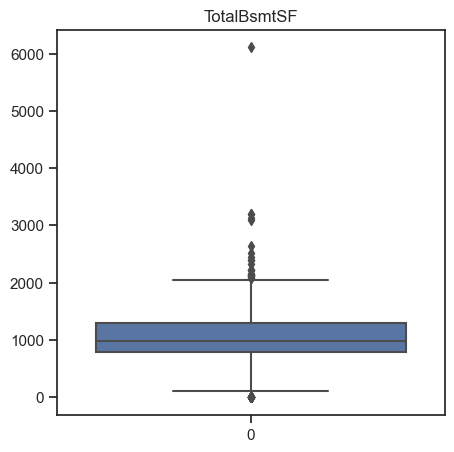

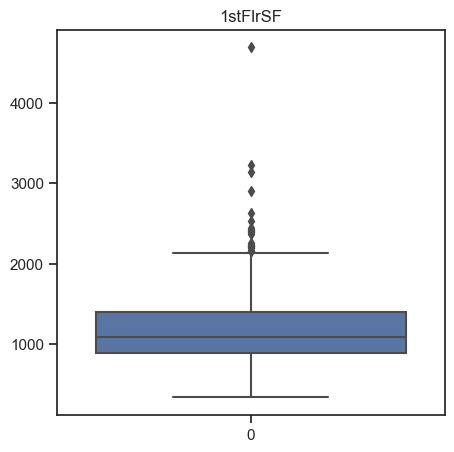

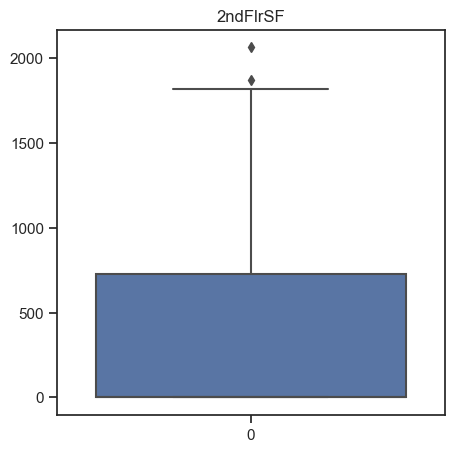

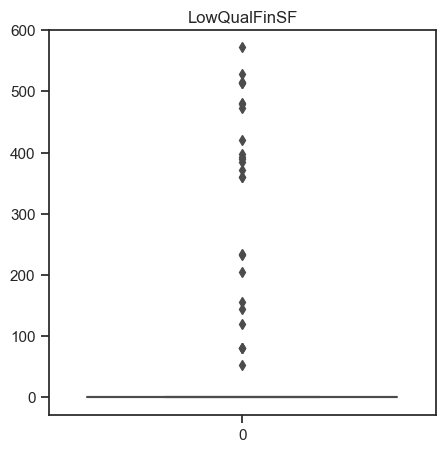

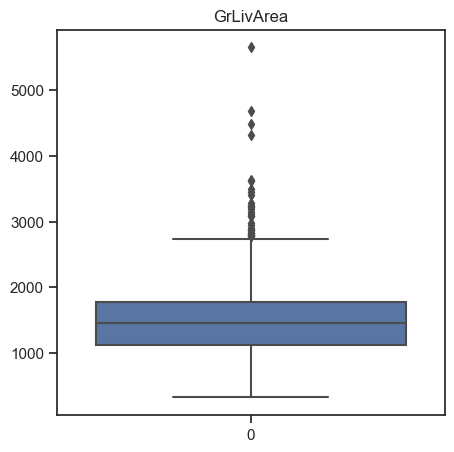

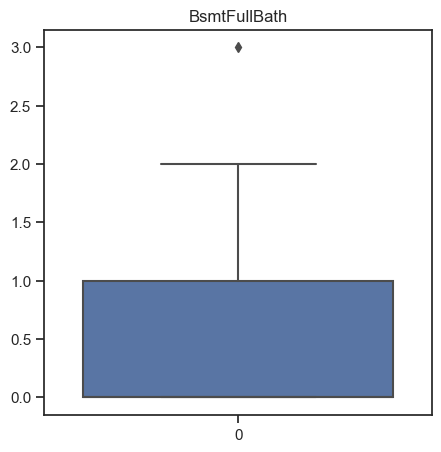

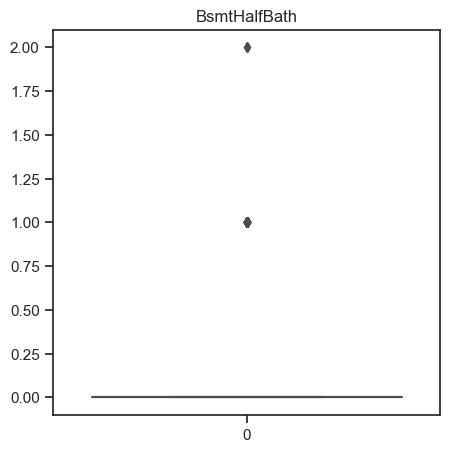

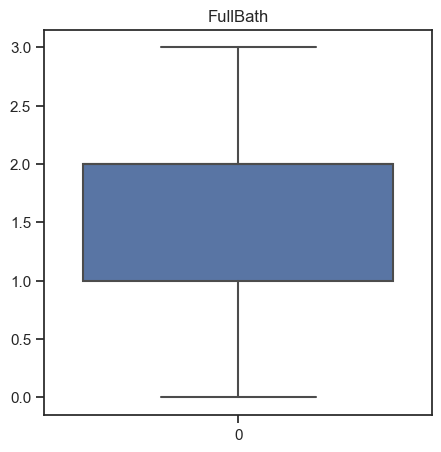

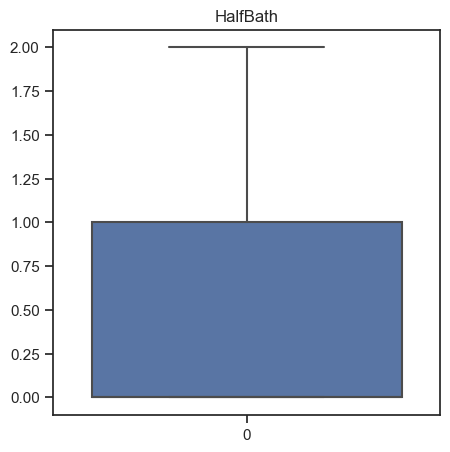

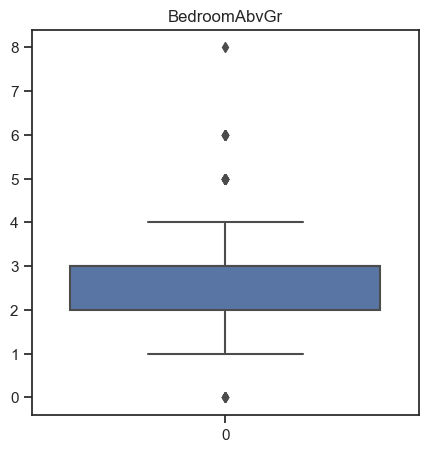

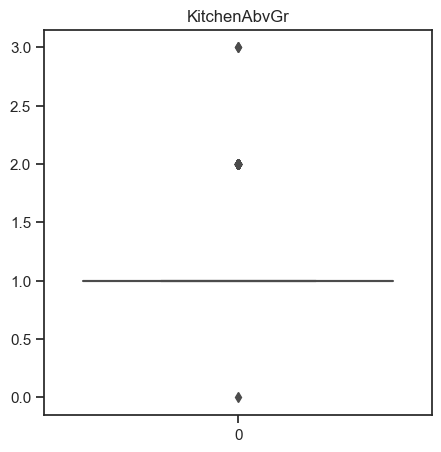

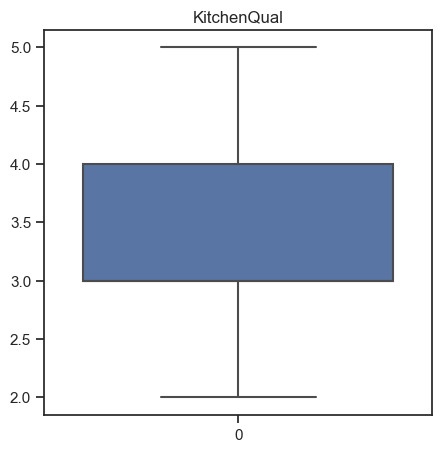

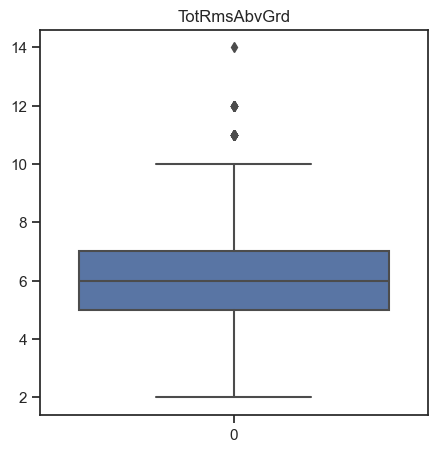

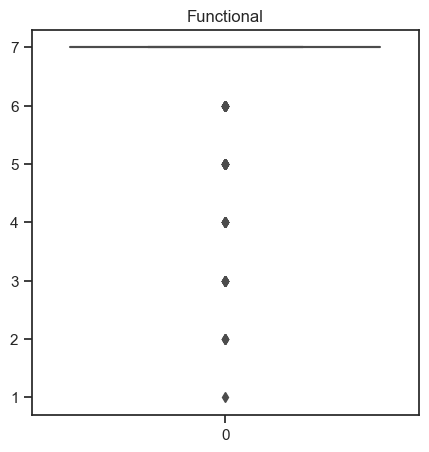

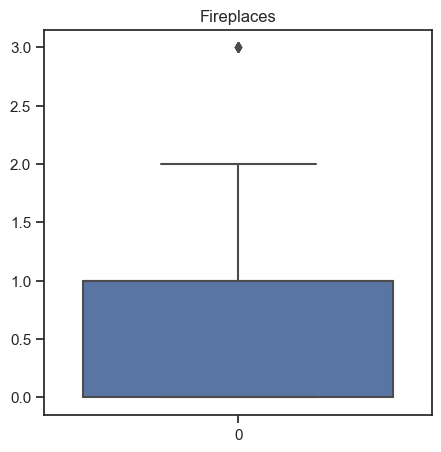

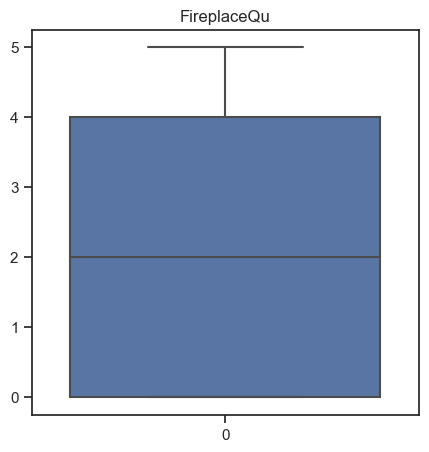

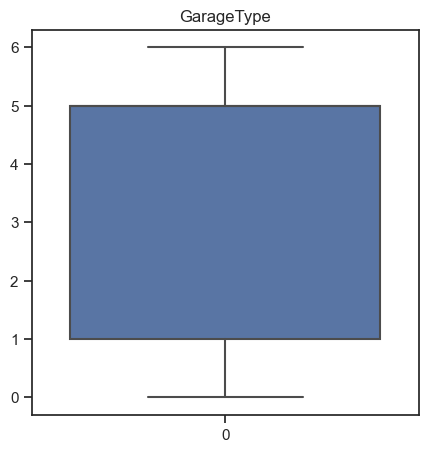

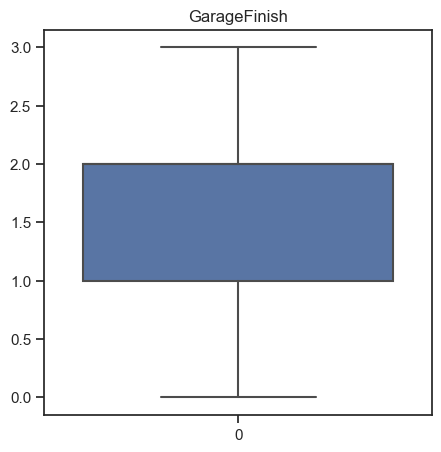

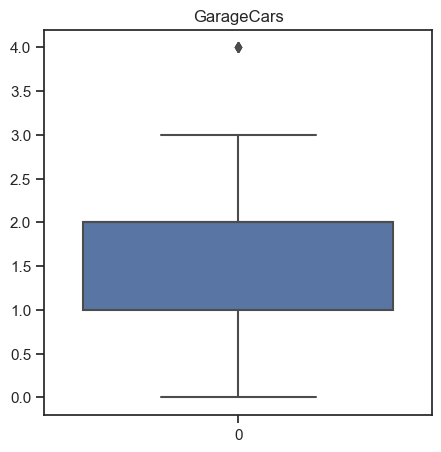

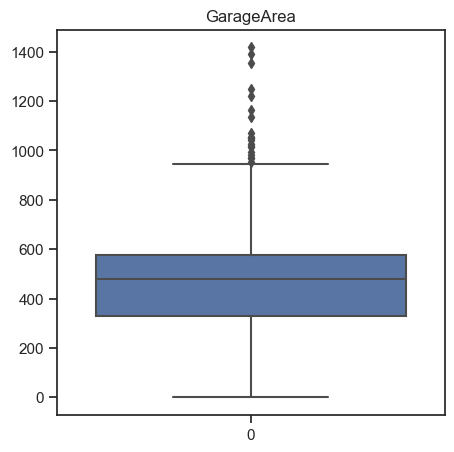

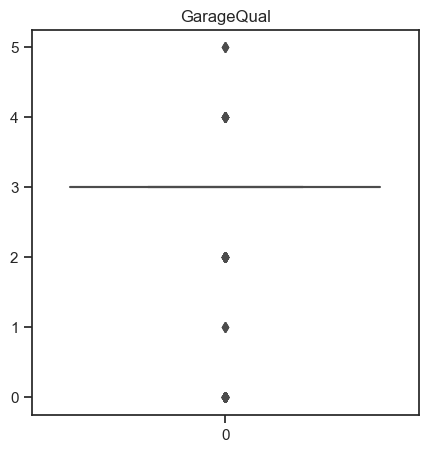

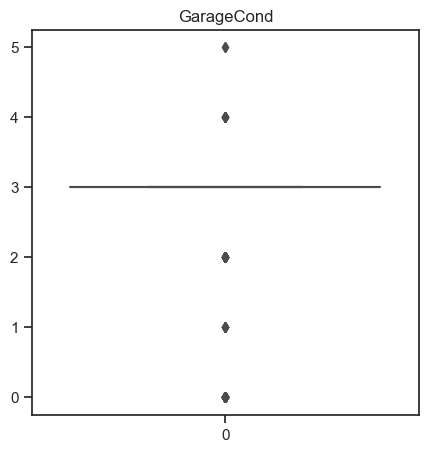

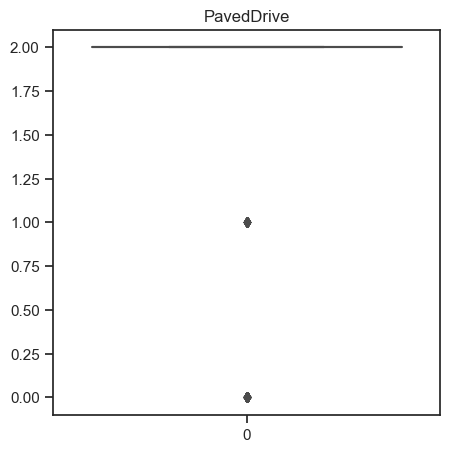

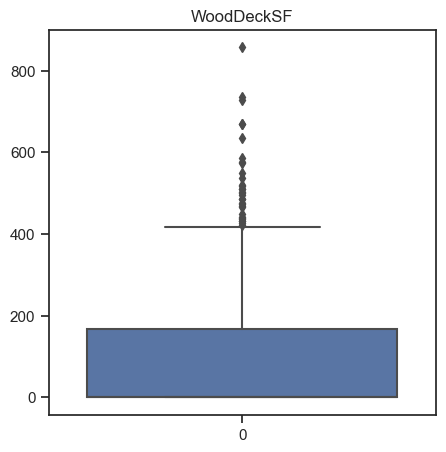

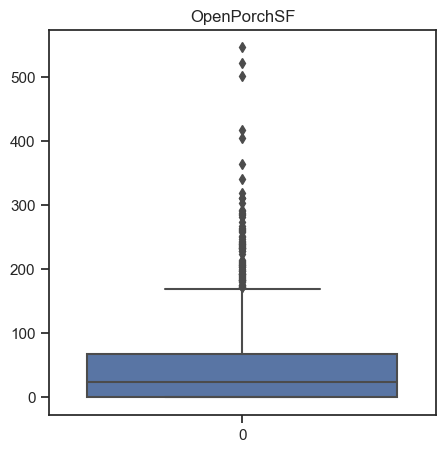

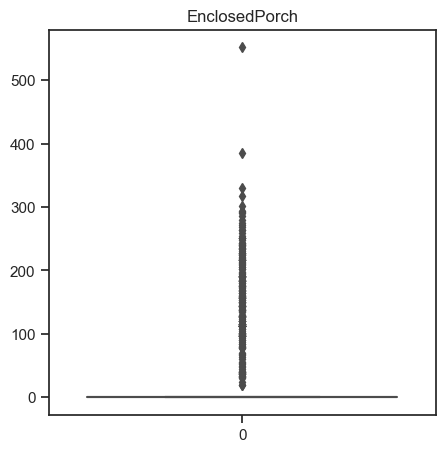

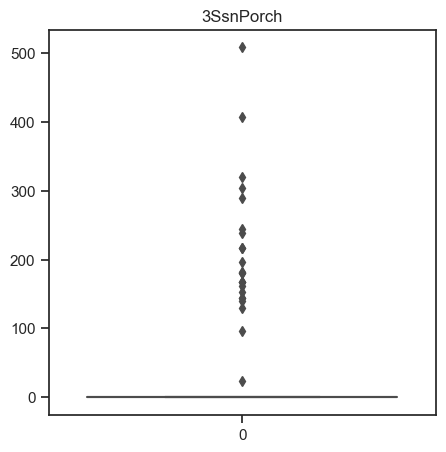

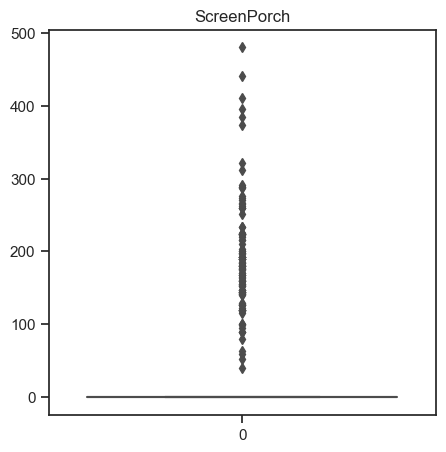

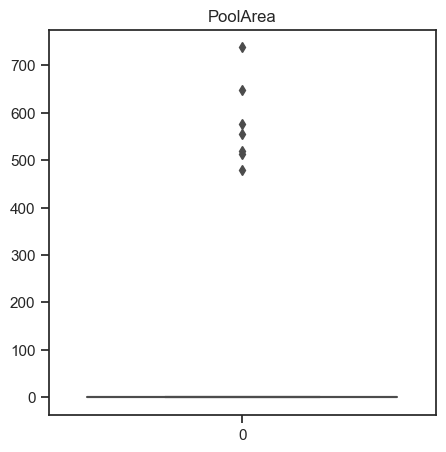

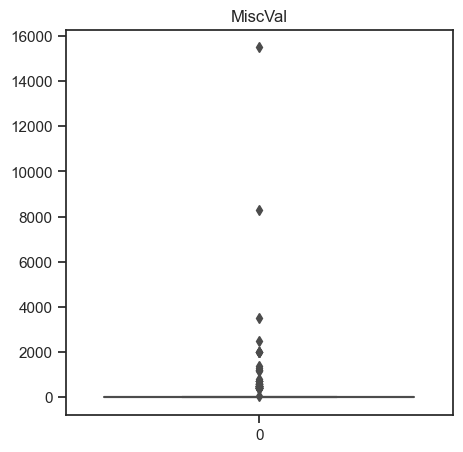

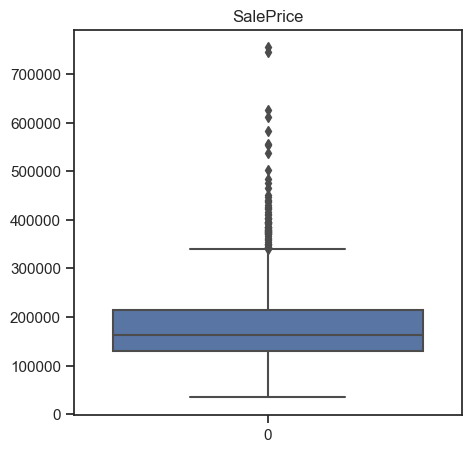

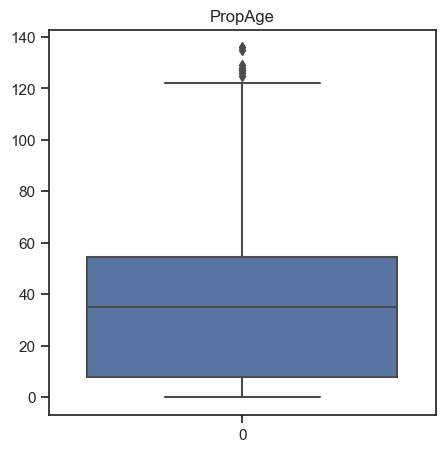

In [1488]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in df[num_col]:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

#### Verifying Distribution or categorical columns

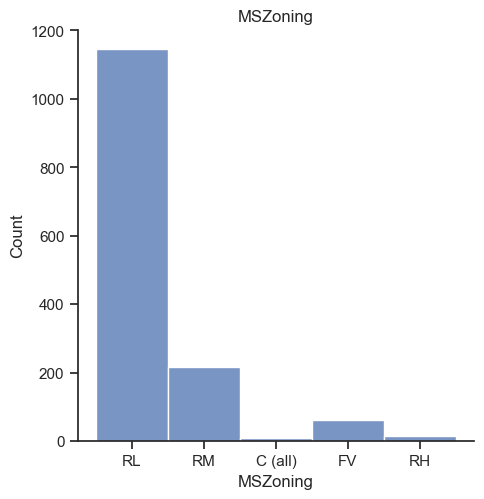

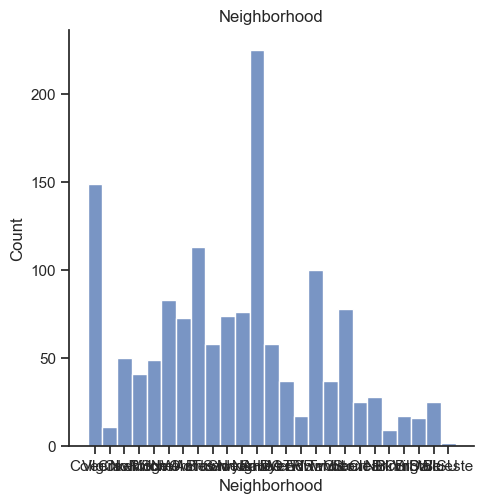

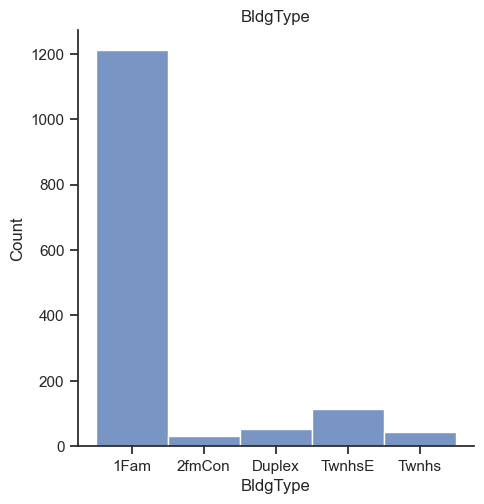

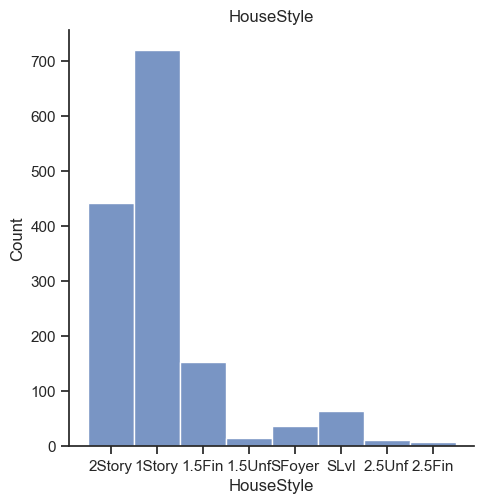

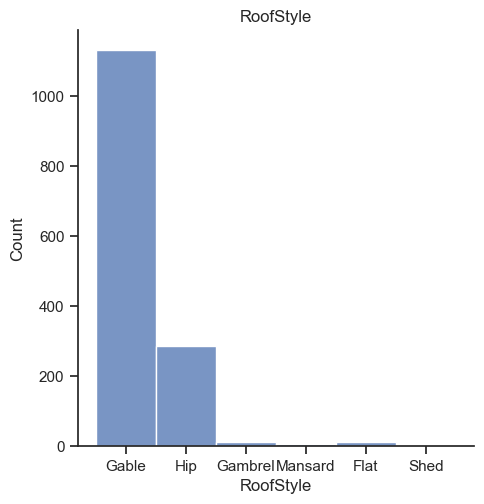

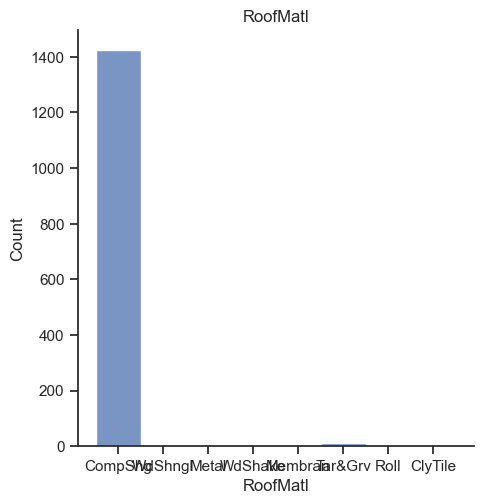

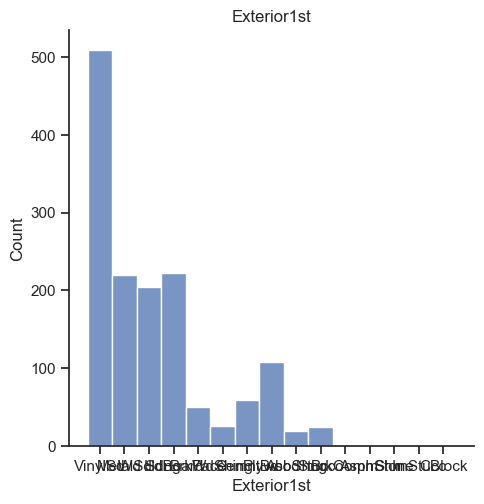

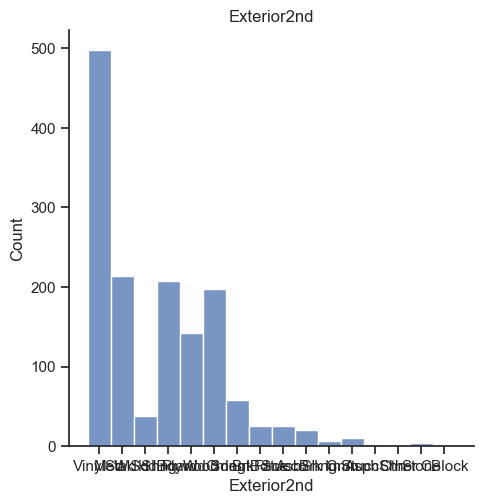

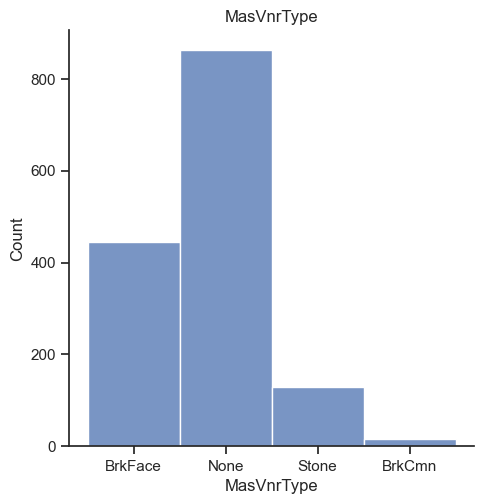

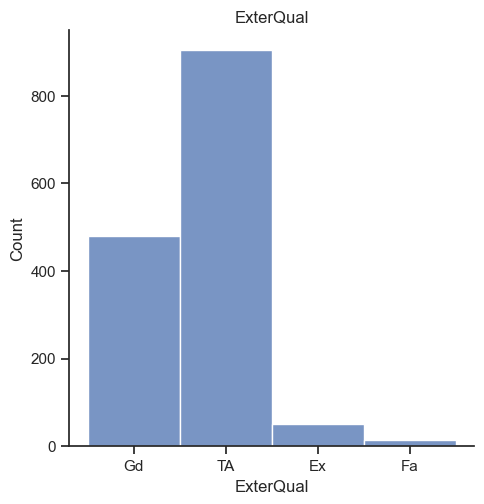

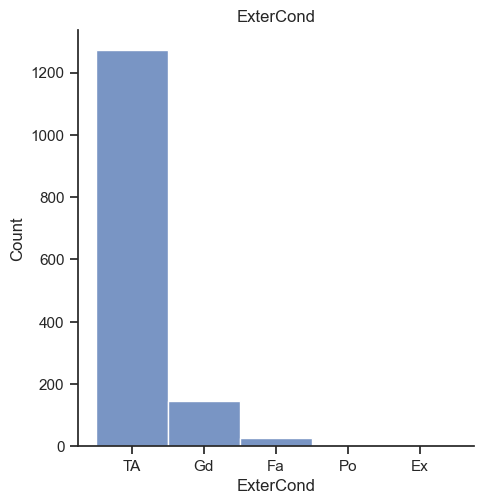

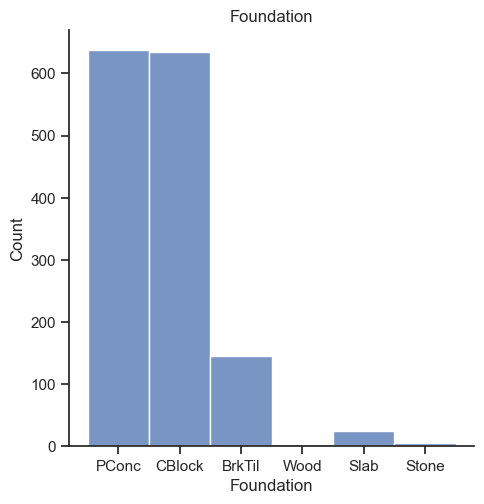

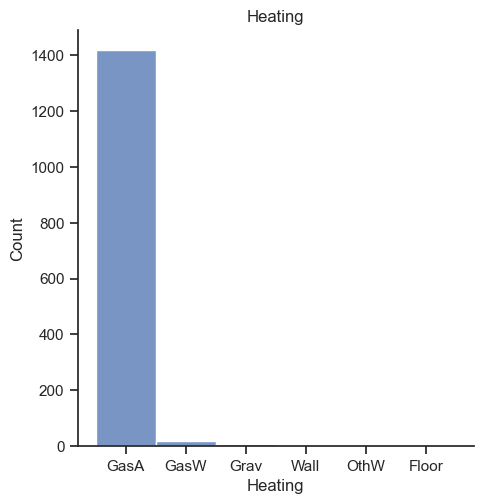

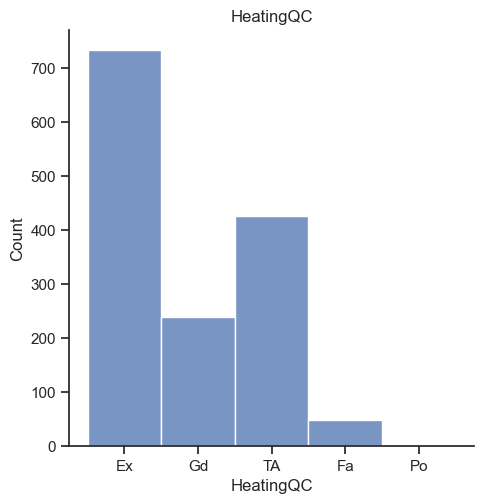

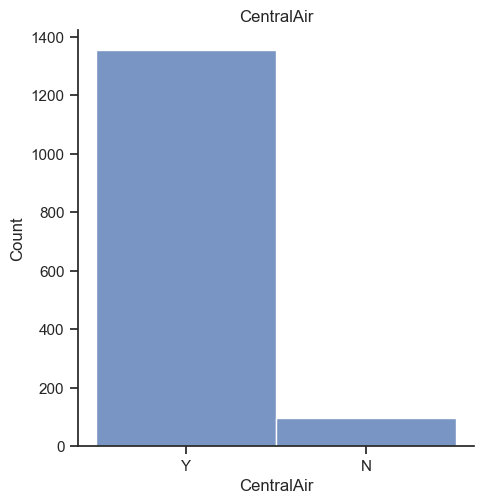

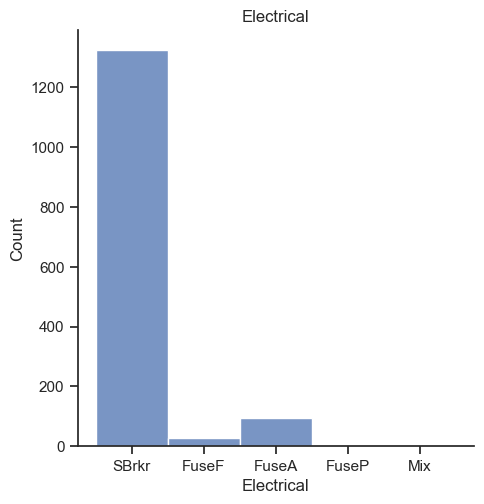

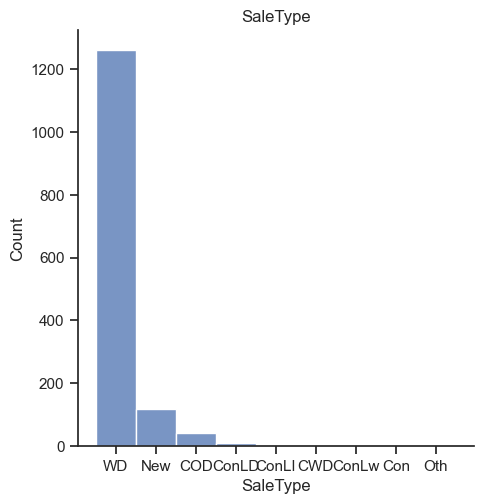

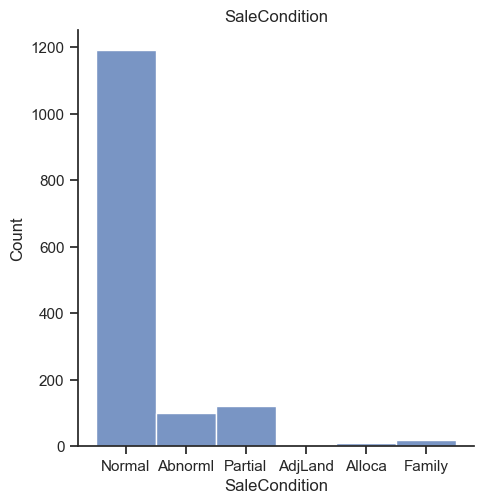

In [1489]:
obj_col = df.select_dtypes(include=[object]).columns

for col in obj_col:
    sns.displot(data=df,x=col)
    plt.title(col)
    plt.show()

#### Creating a Pairplot to check the relation of the features with the Target

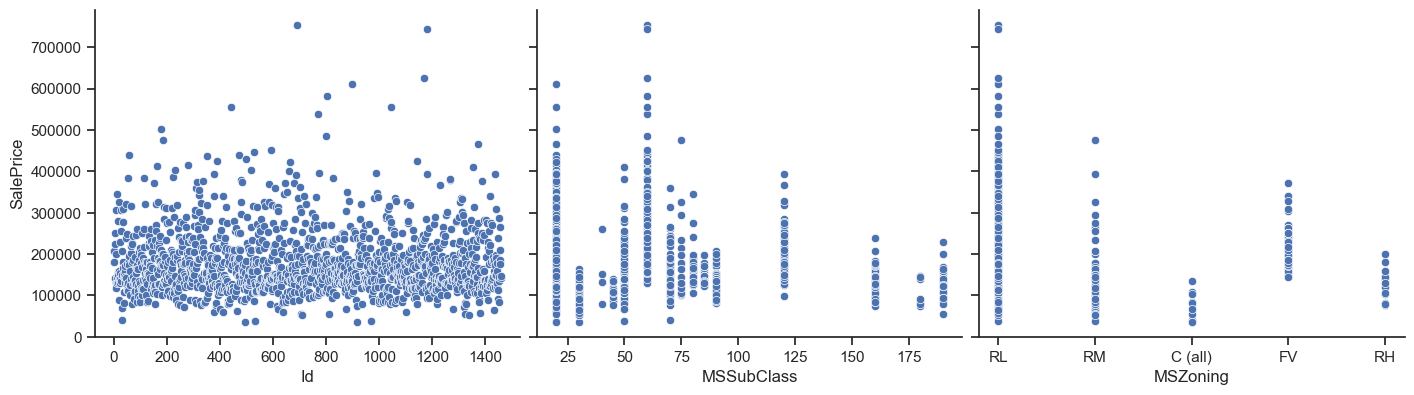

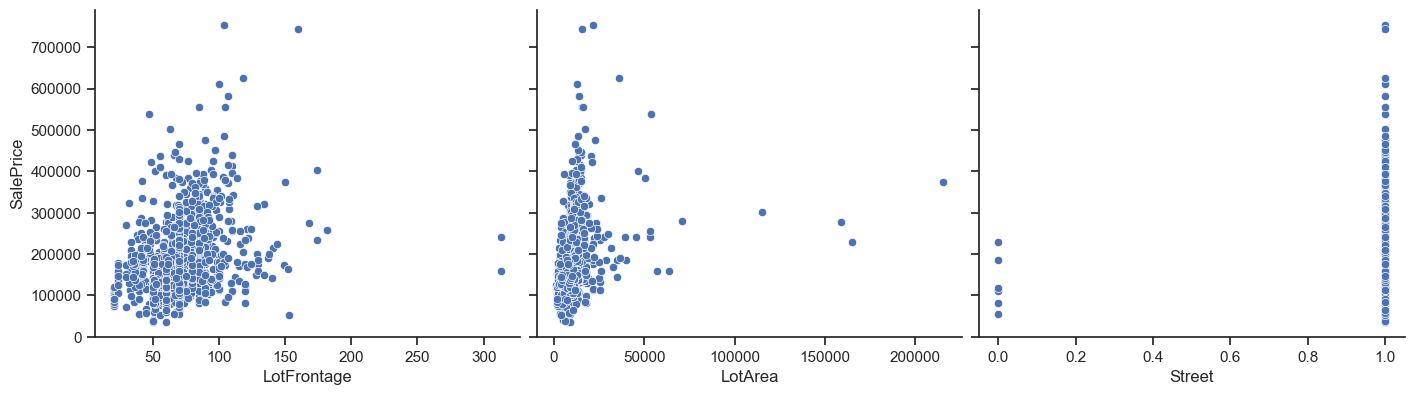

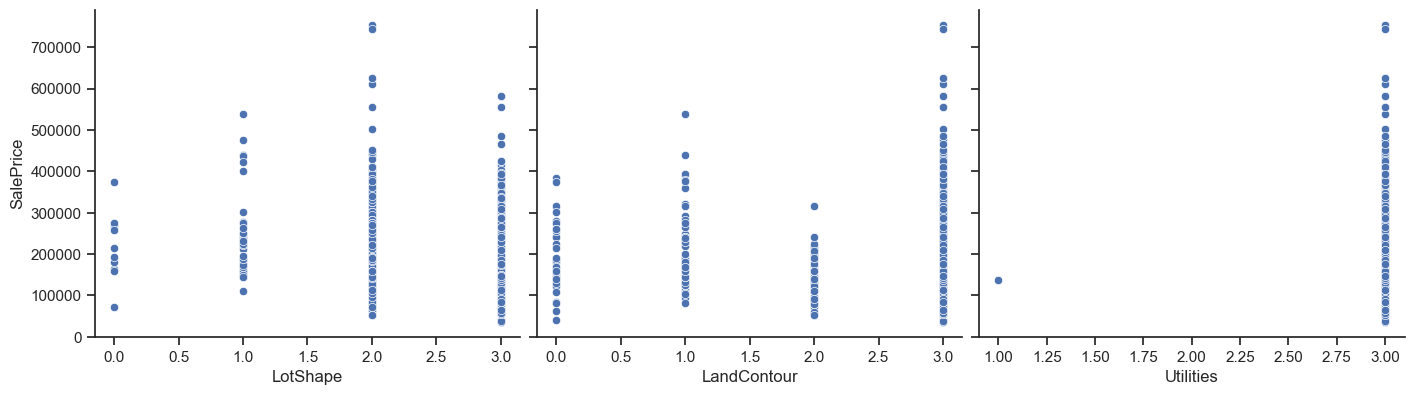

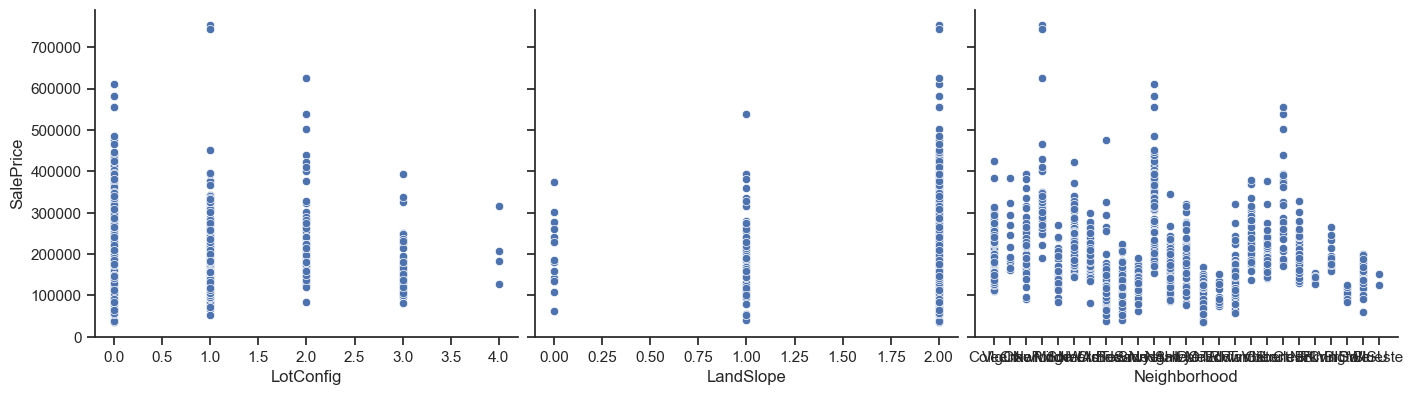

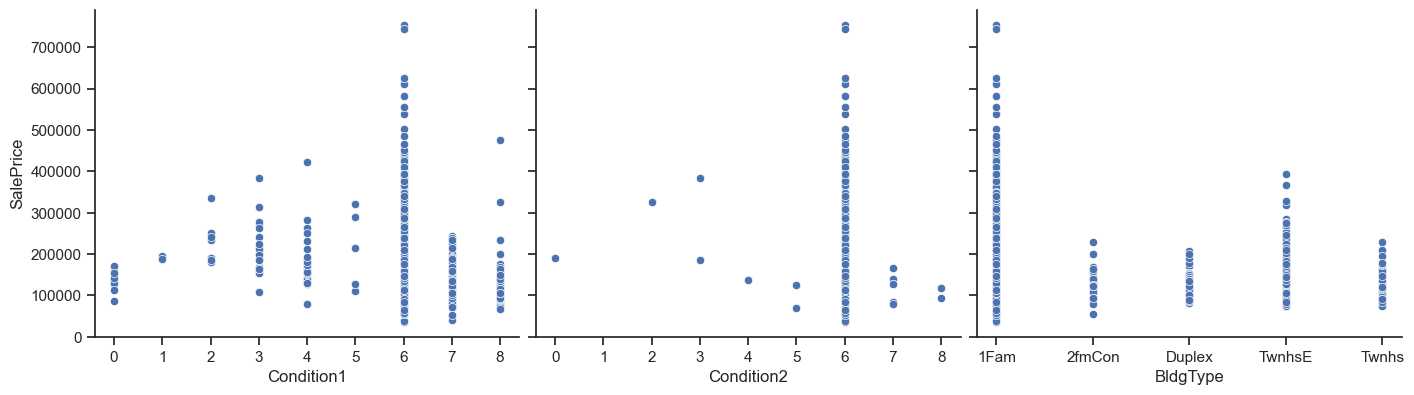

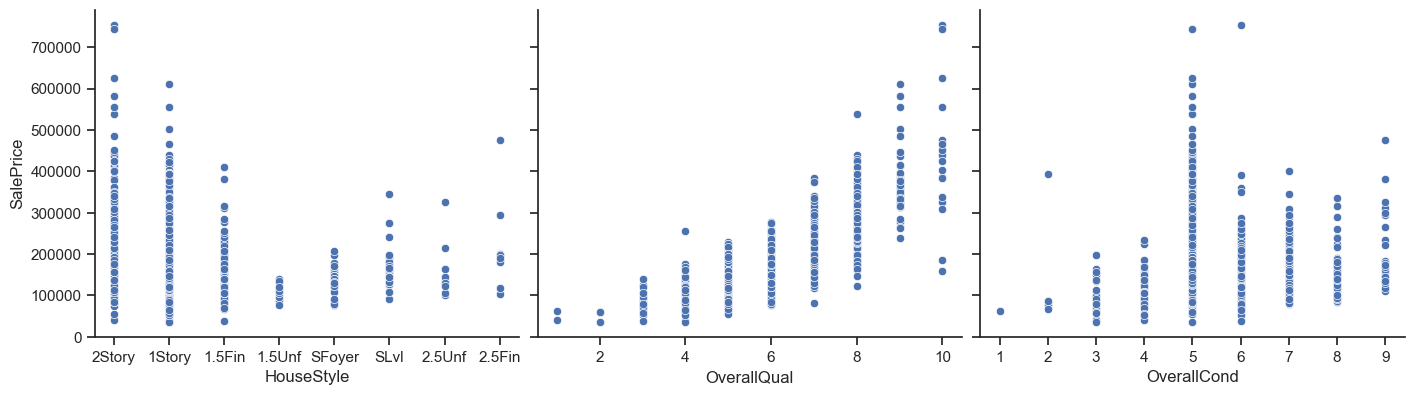

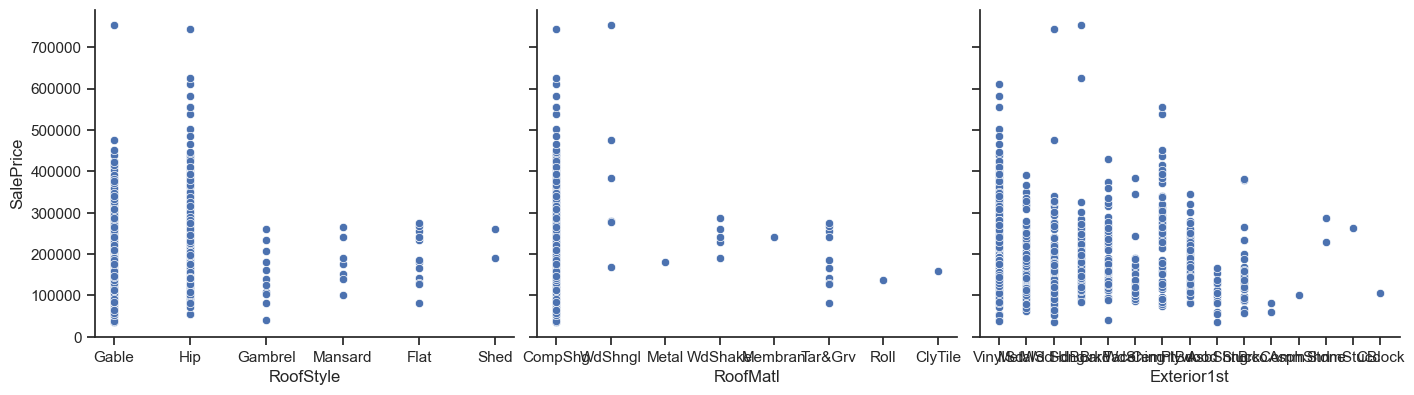

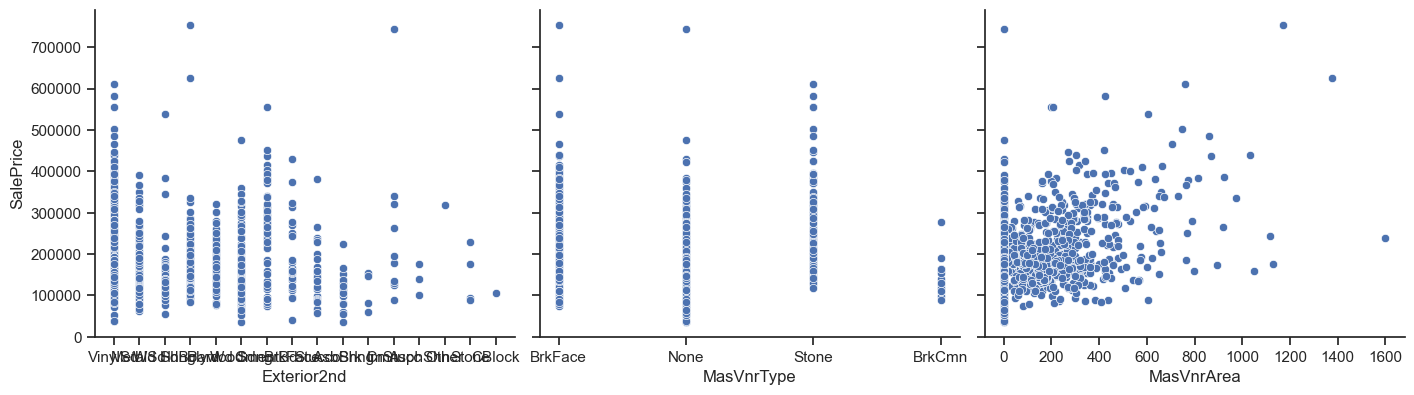

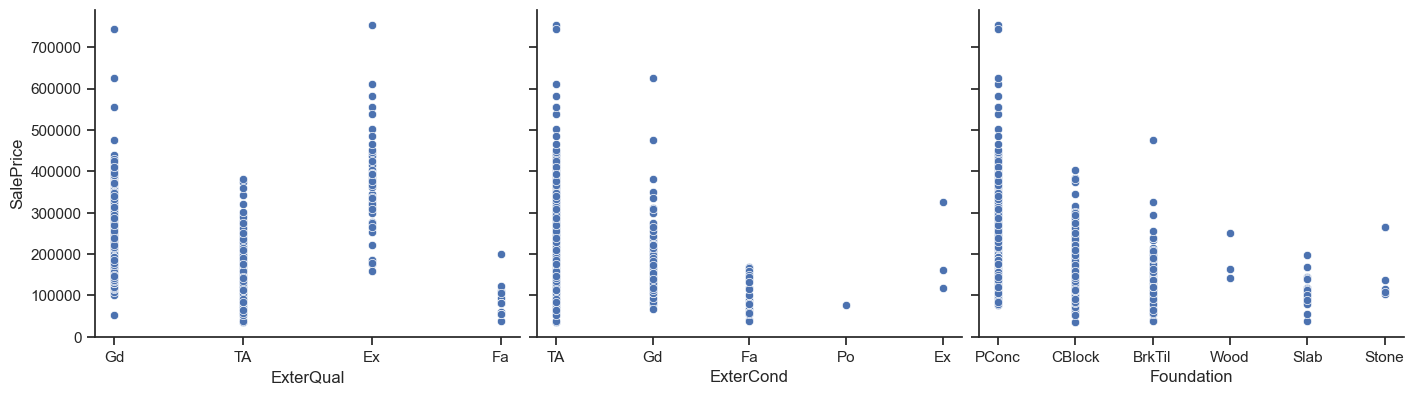

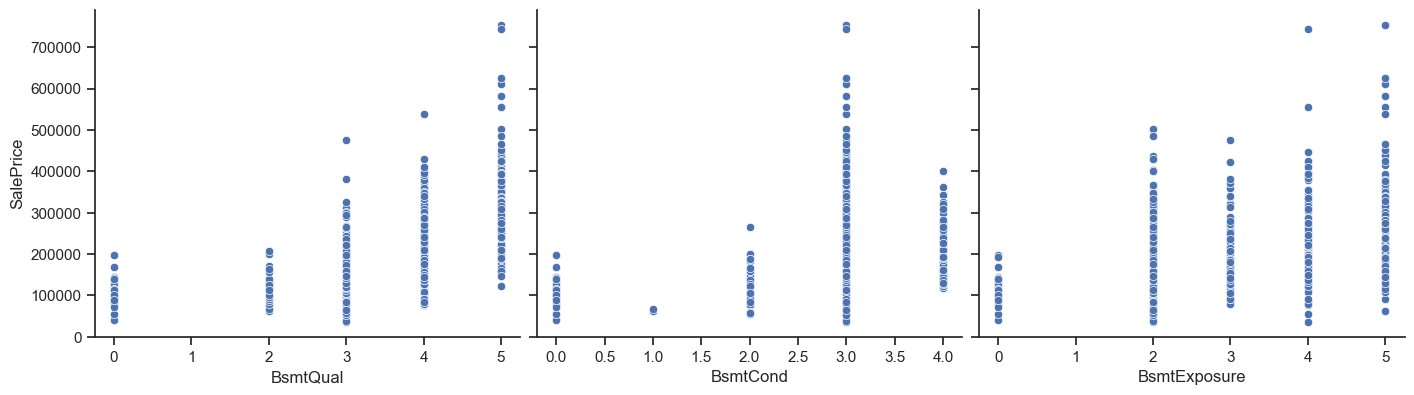

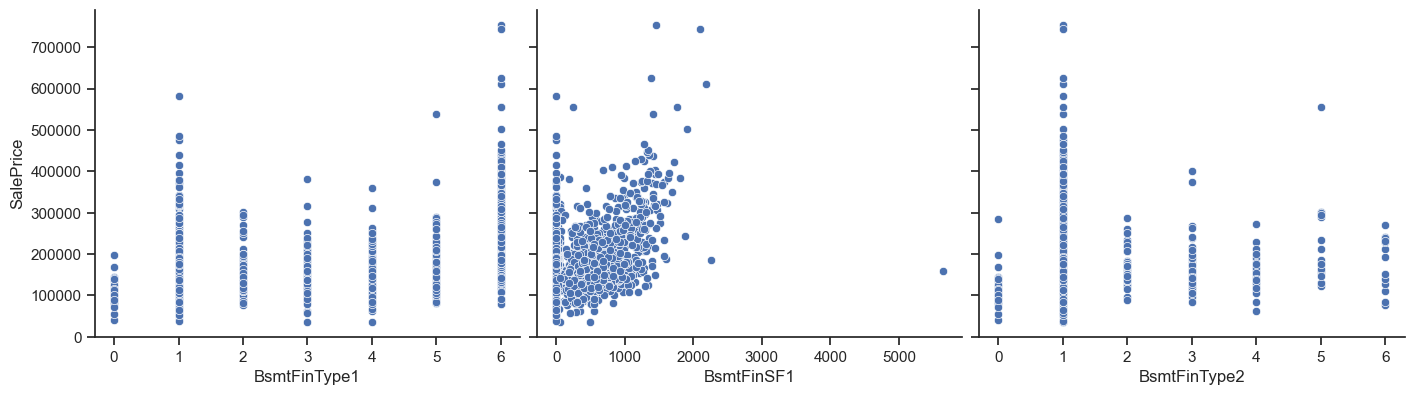

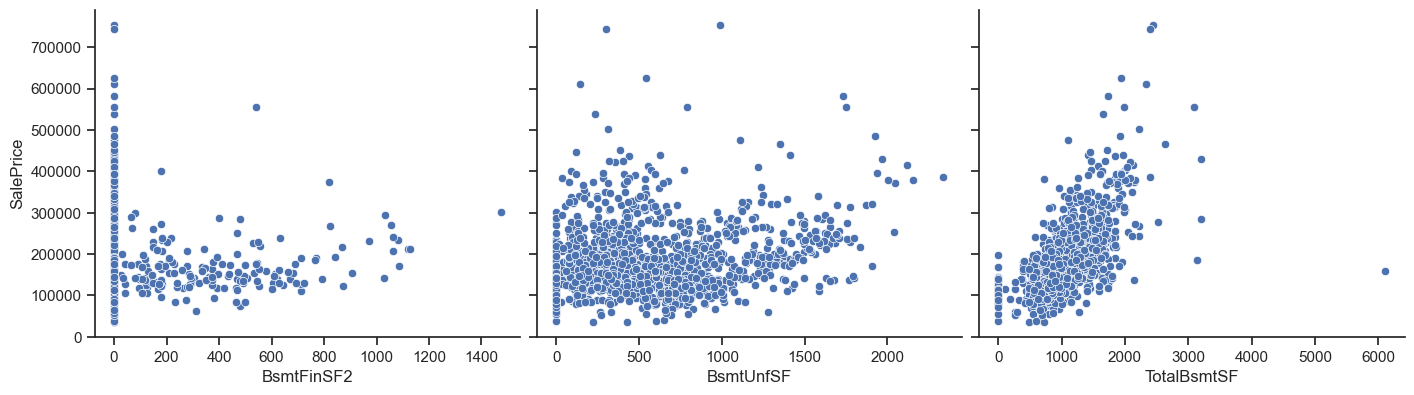

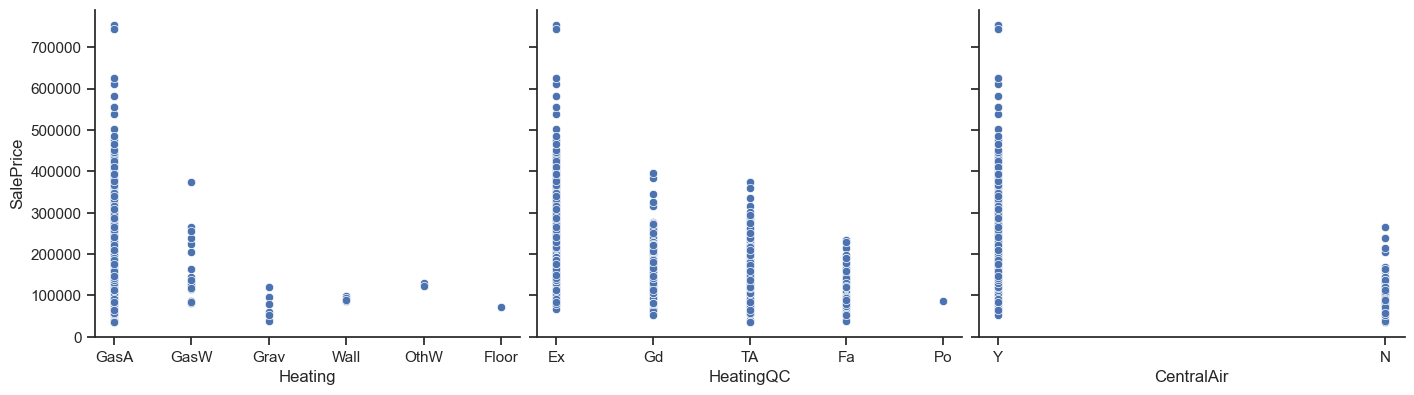

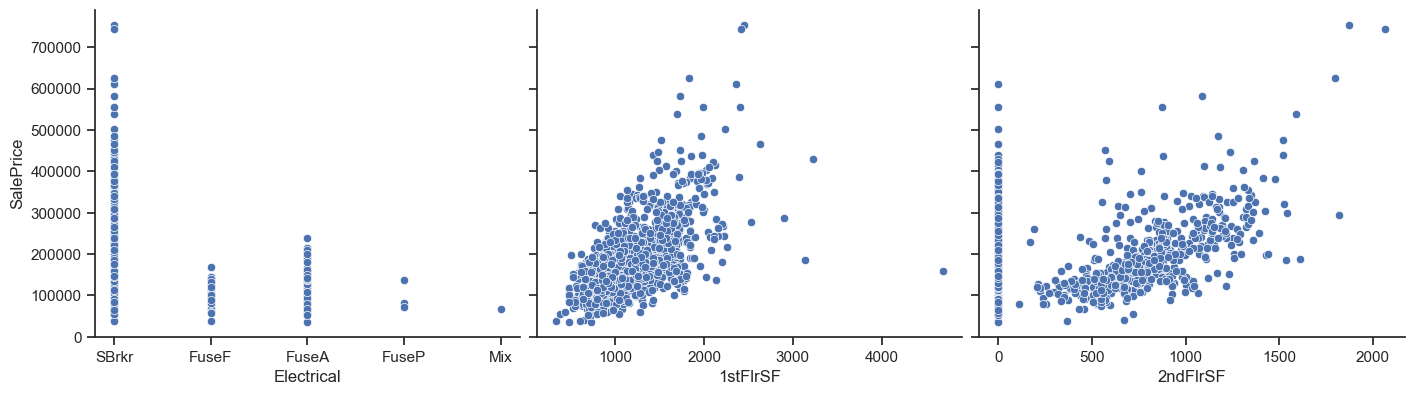

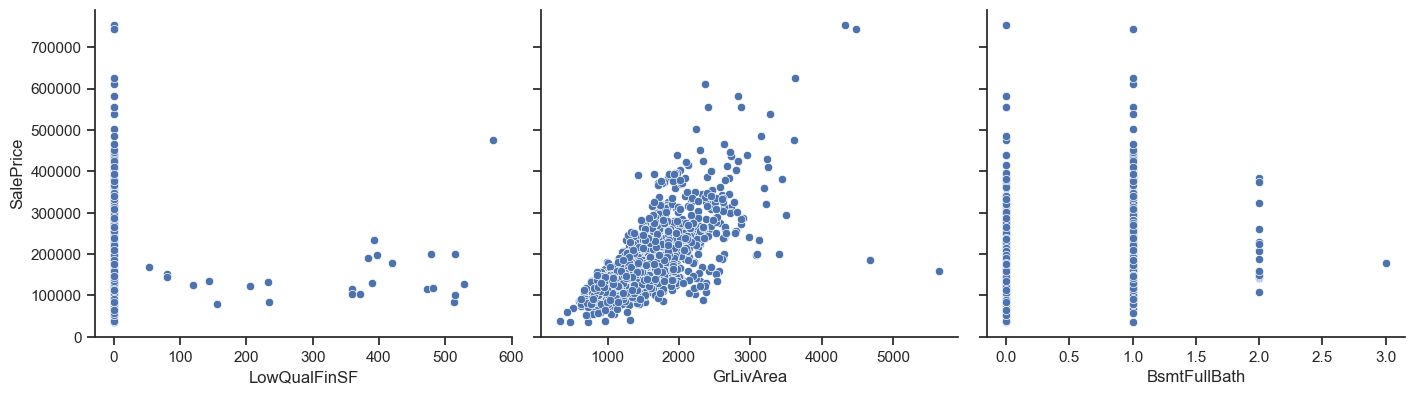

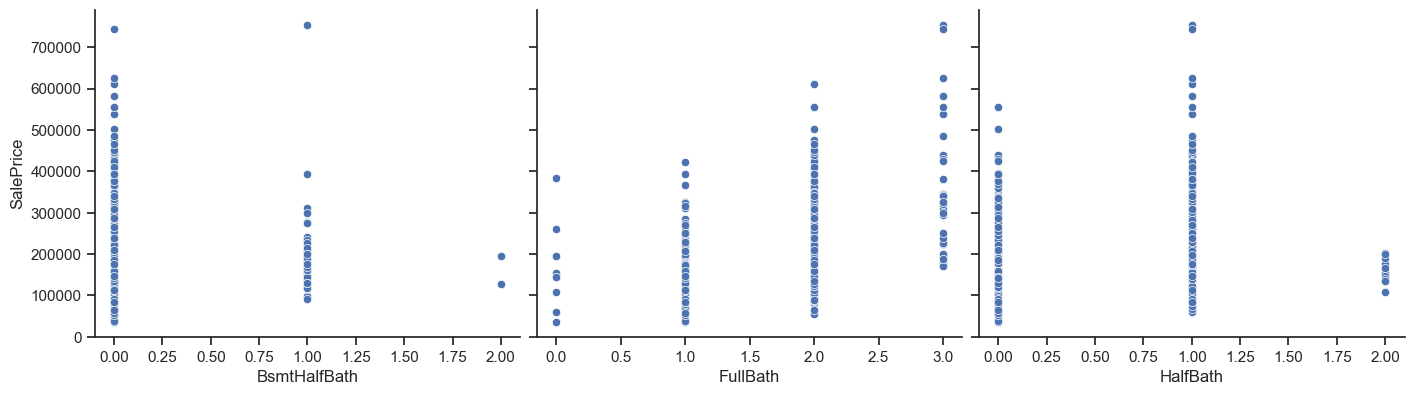

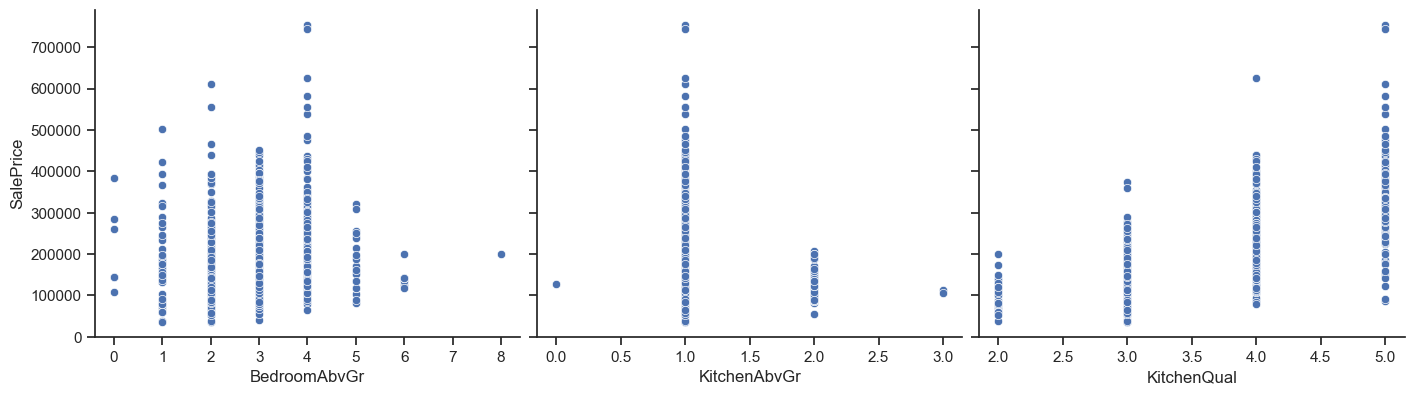

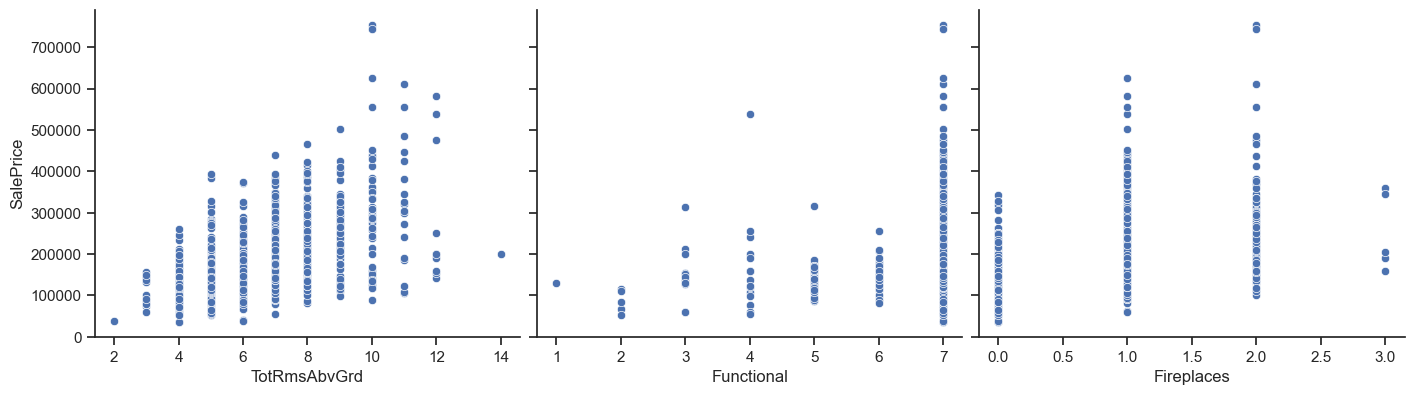

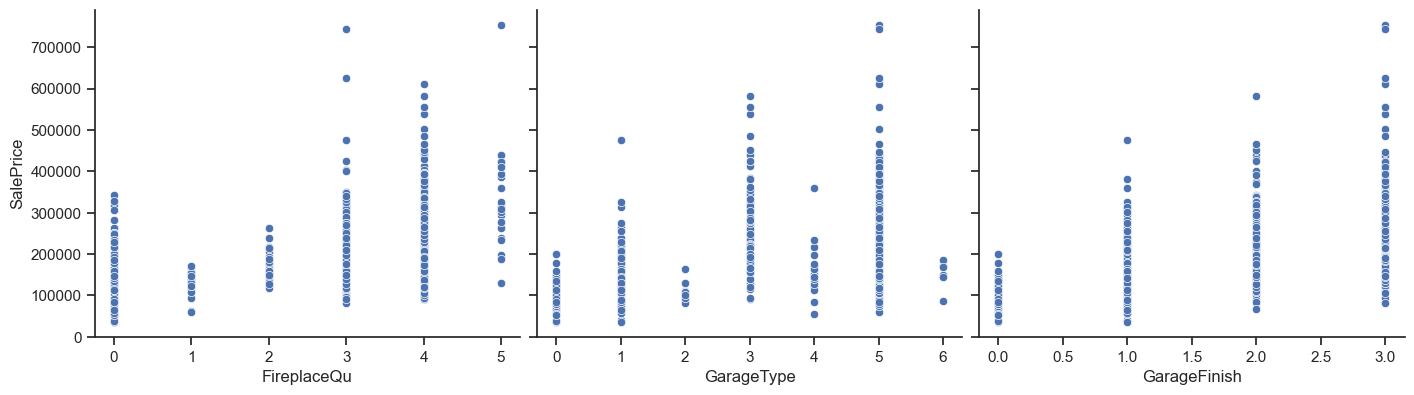

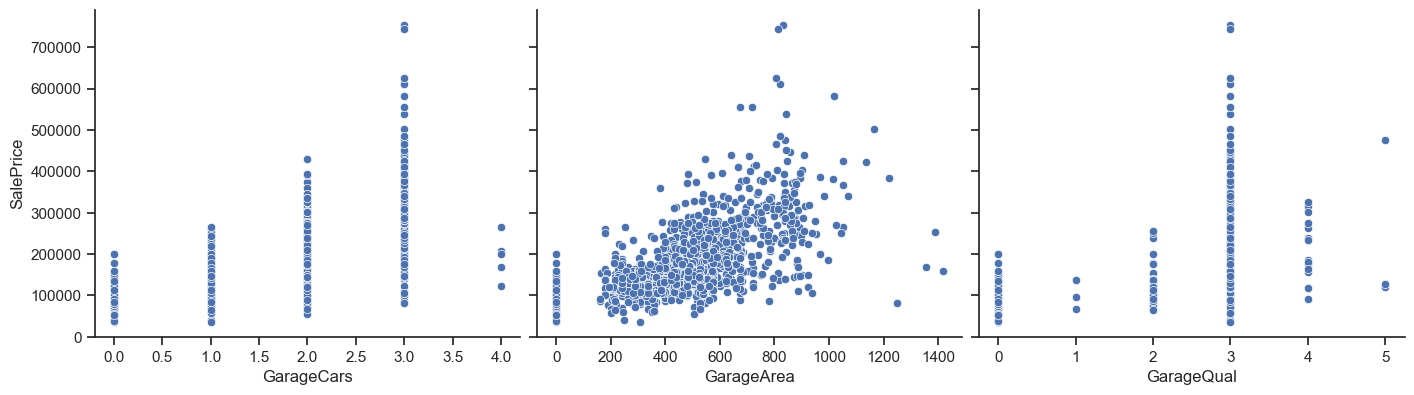

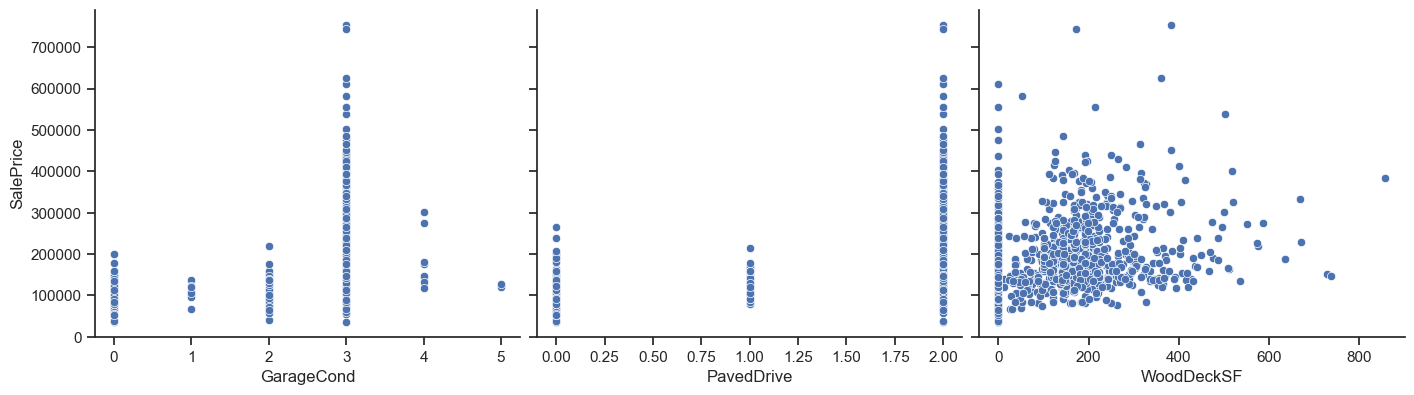

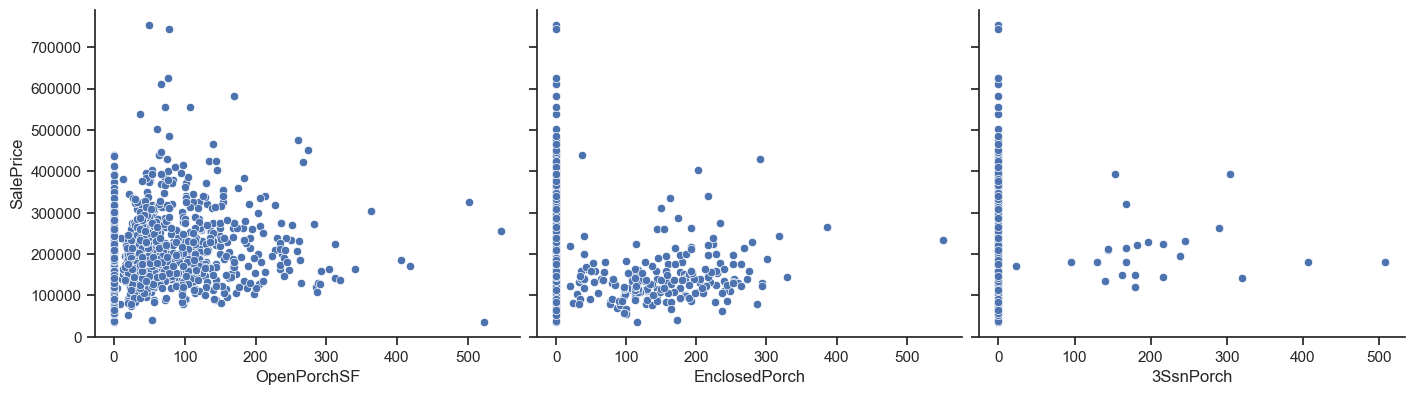

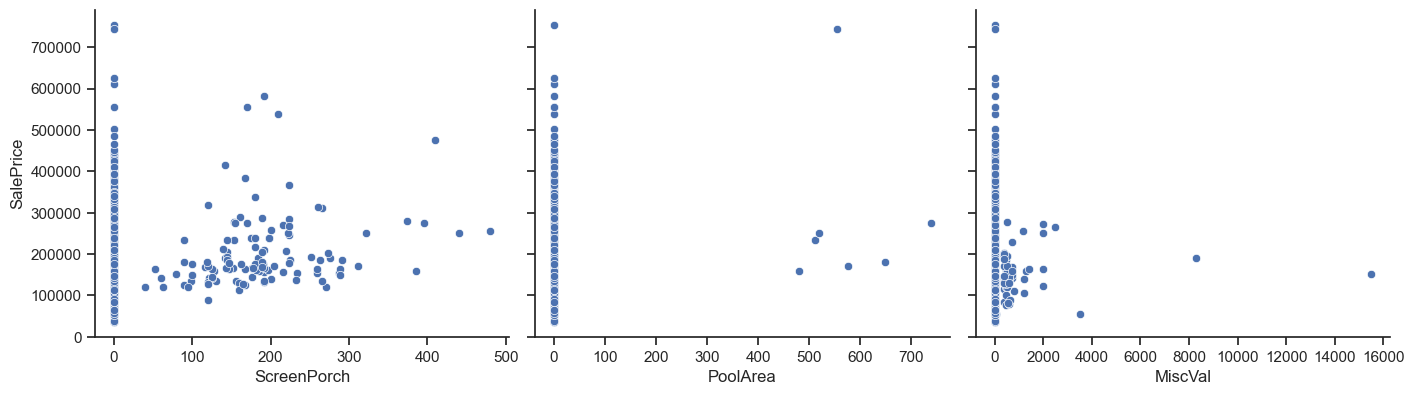

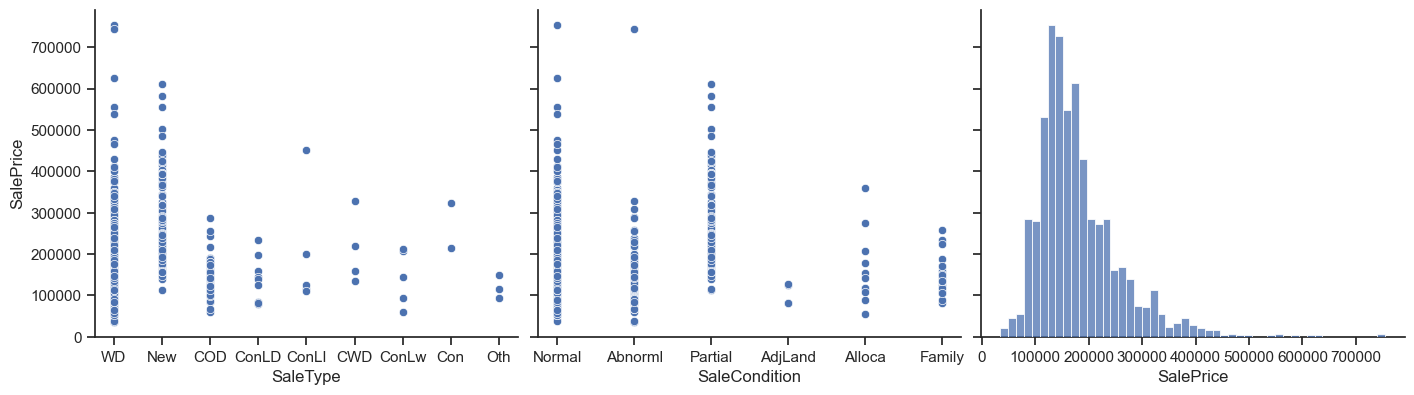

In [1490]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

#### Based on the above analysis, we can remove below Features as they either have very low correlation with Target, or any 1 value of the feature constitue more than 80% of its values

'PoolArea','MiscVal','3SsnPorch','PavedDrive','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','CentralAir','Heating','RoofMatl','BldgType','Condition2','Utilities','Street'

In [1491]:
col_drop=['PoolArea','MiscVal','3SsnPorch','PavedDrive','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','CentralAir','Heating','RoofMatl','BldgType','Condition2','Utilities','Street']
df=df.drop(col_drop, axis=1)

In [1492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   LotShape       1451 non-null   int64  
 6   LandContour    1451 non-null   int64  
 7   LotConfig      1451 non-null   int64  
 8   LandSlope      1451 non-null   int64  
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   int64  
 11  HouseStyle     1451 non-null   object 
 12  OverallQual    1451 non-null   int64  
 13  OverallCond    1451 non-null   int64  
 14  RoofStyle      1451 non-null   object 
 15  Exterior1st    1451 non-null   object 
 16  Exterior2nd    1451 non-null   object 
 17  MasVnrType     1451 non-null   object 
 18  MasVnrAr

#### Calculating the correlation with Target

In [1493]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
round(correlation_with_target*100,2)

SalePrice        100.00
OverallQual       79.01
GrLivArea         71.01
KitchenQual       65.86
GarageCars        63.97
GarageArea        62.25
TotalBsmtSF       61.33
1stFlrSF          60.70
BsmtQual          58.43
FullBath          56.27
GarageFinish      54.95
TotRmsAbvGrd      53.64
FireplaceQu       52.09
MasVnrArea        47.75
Fireplaces        46.90
GarageType        41.52
BsmtFinSF1        38.40
BsmtExposure      37.73
LotFrontage       33.33
WoodDeckSF        32.47
2ndFlrSF          32.28
OpenPorchSF       31.12
BsmtFinType1      30.37
HalfBath          28.23
GarageQual        27.42
LotArea           26.47
GarageCond        26.35
BsmtFullBath      22.50
BsmtUnfSF         21.57
BsmtCond          20.90
BedroomAbvGr      17.20
ScreenPorch       11.30
Functional        10.95
LotConfig          9.45
BsmtFinType2      -0.43
BsmtFinSF2        -1.03
Id                -2.52
LandSlope         -5.23
LandContour       -7.46
OverallCond       -7.64
MSSubClass        -8.28
Condition1      

#### Plotting into a heatmap

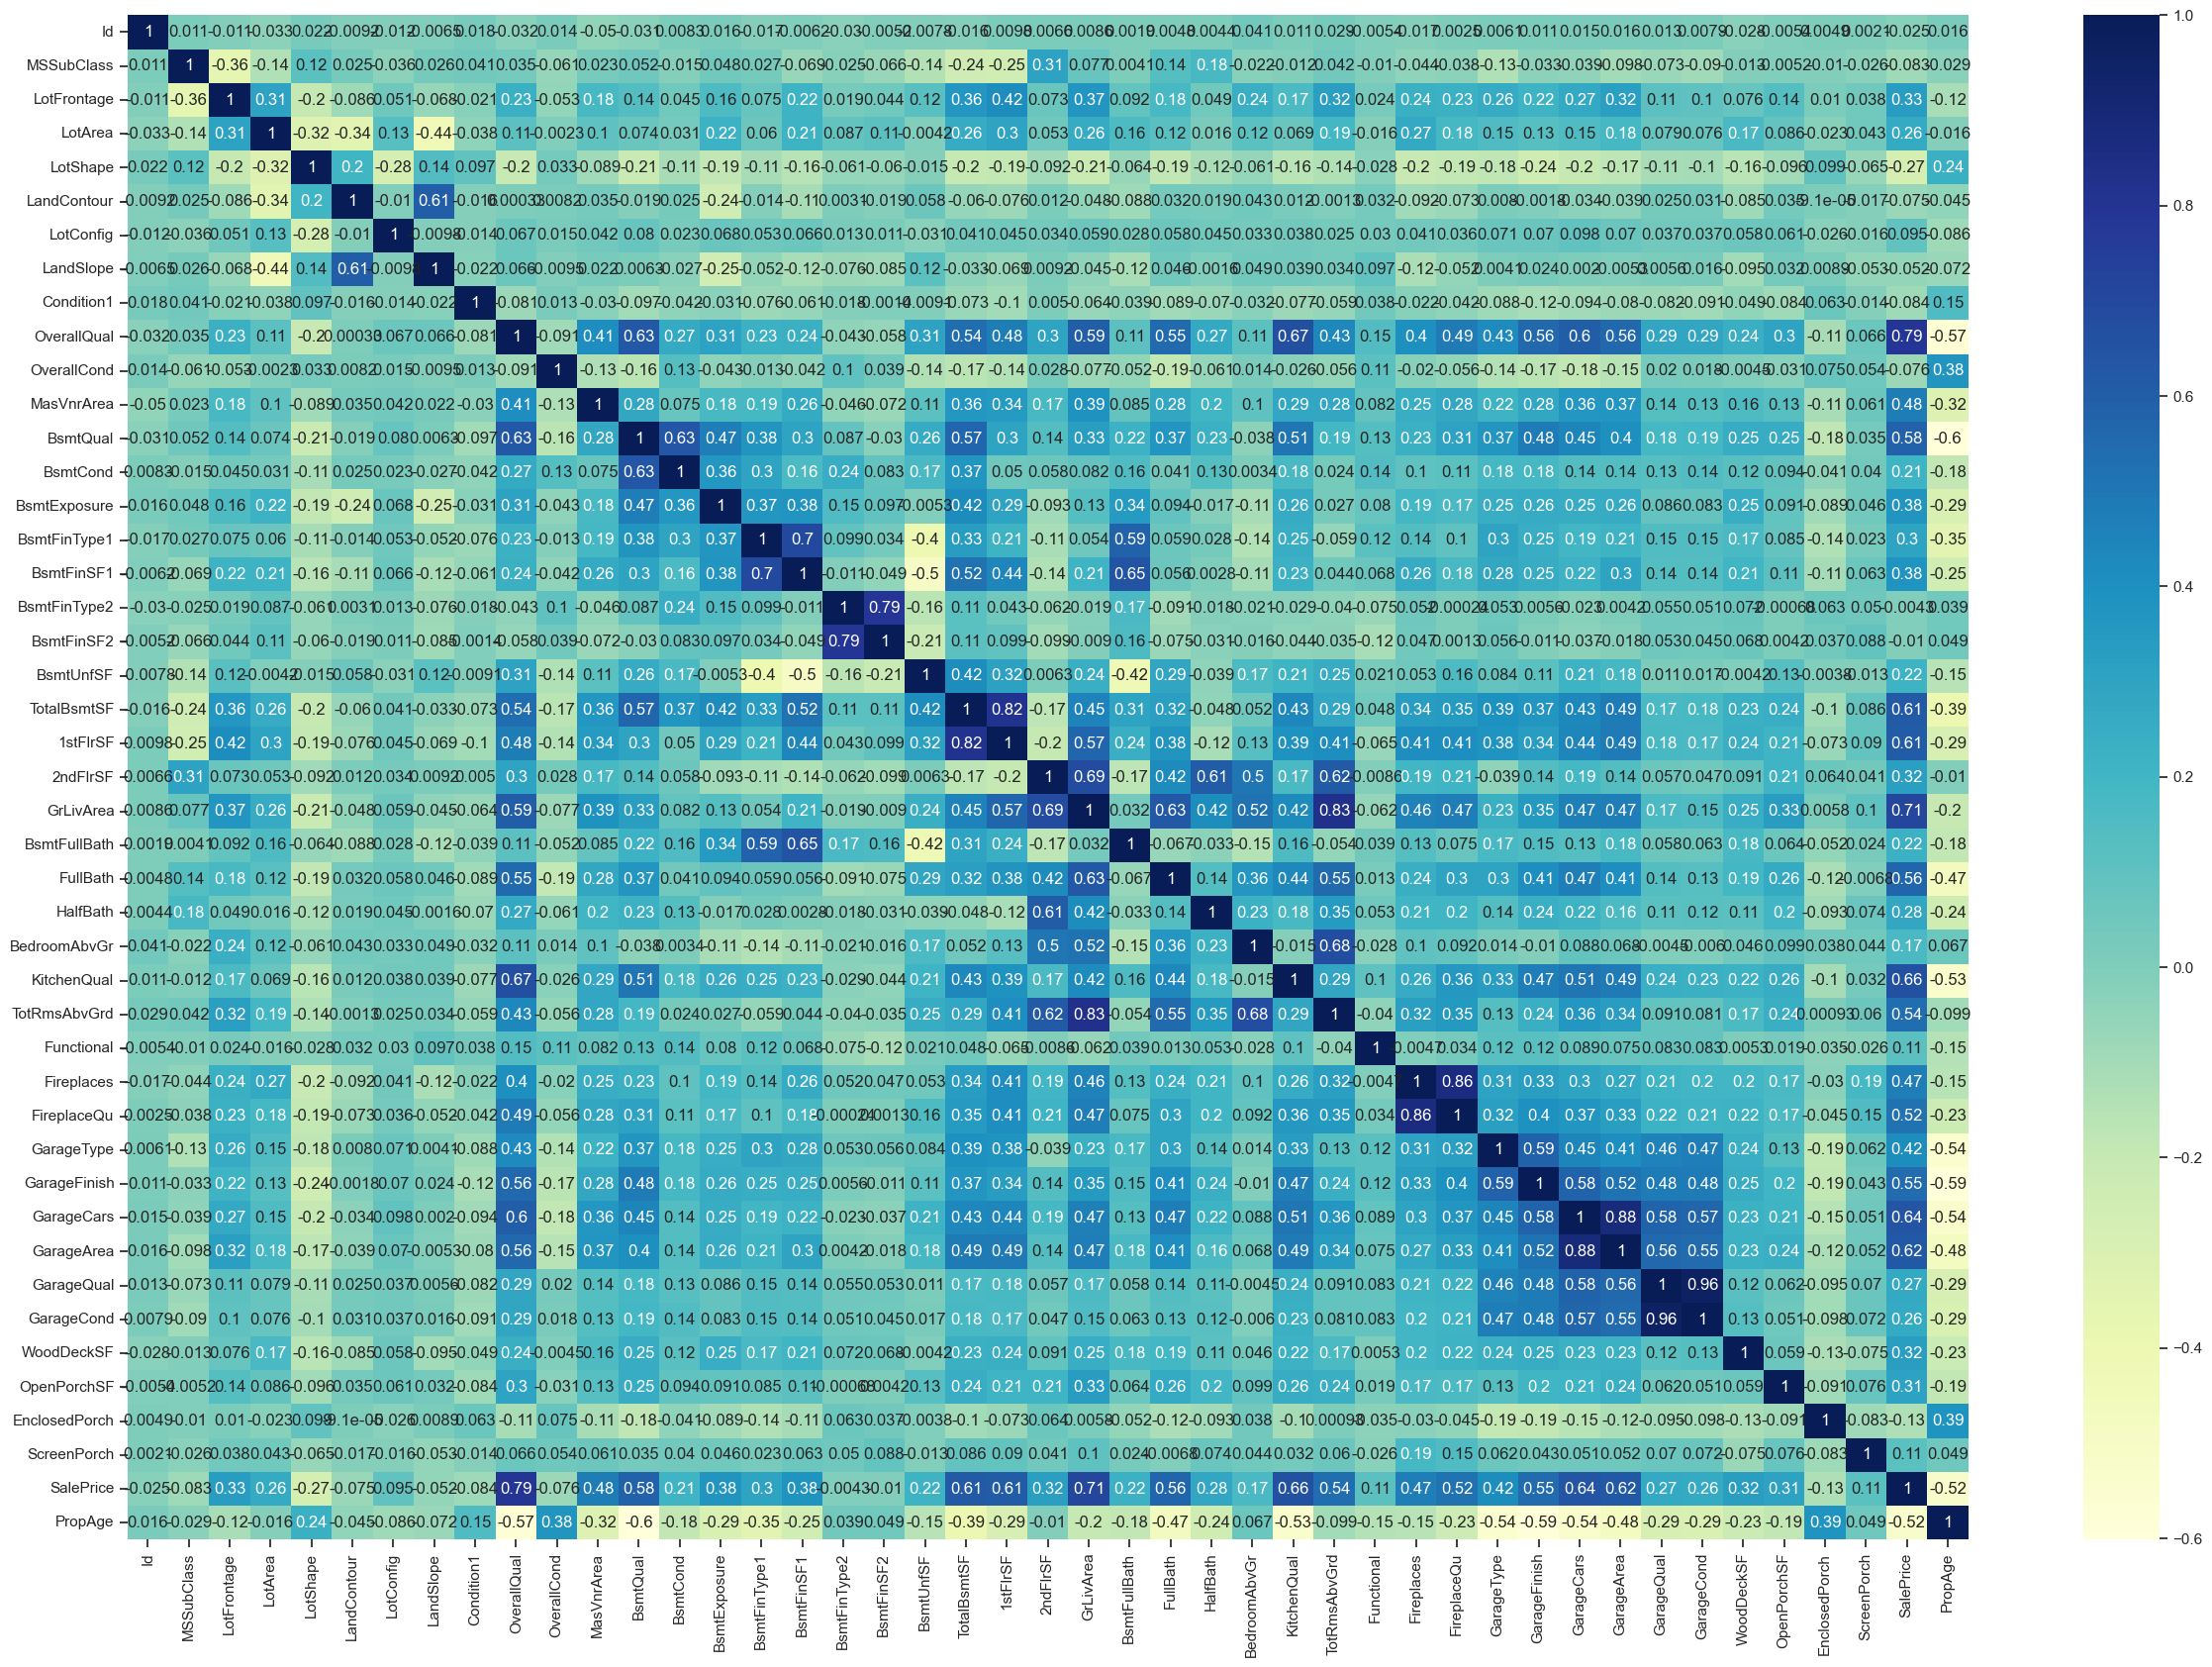

In [1494]:
plt.figure(figsize=(30,20))
cor=df.corr()
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [1495]:
#Deleting ID column
df=df.drop('Id', axis=1)

In [1496]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
obj_col = df.select_dtypes(include=[object]).columns

In [1497]:
df[obj_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1451 non-null   object
 1   Neighborhood   1451 non-null   object
 2   HouseStyle     1451 non-null   object
 3   RoofStyle      1451 non-null   object
 4   Exterior1st    1451 non-null   object
 5   Exterior2nd    1451 non-null   object
 6   MasVnrType     1451 non-null   object
 7   ExterQual      1451 non-null   object
 8   ExterCond      1451 non-null   object
 9   Foundation     1451 non-null   object
 10  HeatingQC      1451 non-null   object
 11  Electrical     1451 non-null   object
 12  SaleType       1451 non-null   object
 13  SaleCondition  1451 non-null   object
dtypes: object(14)
memory usage: 202.3+ KB


In [1498]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   LotFrontage    1451 non-null   float64
 2   LotArea        1451 non-null   int64  
 3   LotShape       1451 non-null   int64  
 4   LandContour    1451 non-null   int64  
 5   LotConfig      1451 non-null   int64  
 6   LandSlope      1451 non-null   int64  
 7   Condition1     1451 non-null   int64  
 8   OverallQual    1451 non-null   int64  
 9   OverallCond    1451 non-null   int64  
 10  MasVnrArea     1451 non-null   float64
 11  BsmtQual       1451 non-null   int64  
 12  BsmtCond       1451 non-null   int64  
 13  BsmtExposure   1451 non-null   int64  
 14  BsmtFinType1   1451 non-null   int64  
 15  BsmtFinSF1     1451 non-null   int64  
 16  BsmtFinType2   1451 non-null   int64  
 17  BsmtFinSF2     1451 non-null   int64  
 18  BsmtUnfS

#### Removing outliers from all numerical Features by shaving off the top and bottom by 5%

In [1499]:
for col in num_col:
    df[col][df[col] <= df[col].quantile(0.05)] = df[col].quantile(0.05)
    df[col][df[col] >= df[col].quantile(0.95)] = df[col].quantile(0.95)

#### Scaling Numerical Data

In [1500]:
# Scaling the data between 0 and 1
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df[num_col])

array([[0.28571429, 0.42647059, 0.36885042, ..., 0.        , 0.50670277,
        0.04444444],
       [0.        , 0.64705882, 0.45078551, ..., 0.        , 0.39316771,
        0.33333333],
       [0.28571429, 0.47058824, 0.56834455, ..., 0.        , 0.56977781,
        0.06666667],
       ...,
       [0.35714286, 0.44117647, 0.41102918, ..., 0.        , 0.75059291,
        0.75555556],
       [0.        , 0.47058824, 0.45912151, ..., 0.        , 0.22759575,
        0.65555556],
       [0.        , 0.57352941, 0.47479605, ..., 0.        , 0.25019764,
        0.46666667]])

#### Creating Dummy variables for categorical data

In [1501]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df[obj_col], drop_first=True)
df_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
0            0            0            1            0                     0   
1            0            0            1            0                     0   
2            0            0            1            0                     0   
3            0            0            1            0                     0   
4            0            0            1            0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  HouseStyle_1.5Unf  \
0                    0                     0                  0   
1                    0                     1                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  0                  0                  0                  1   
1                  1  

In [1502]:
df=df.drop(obj_col, axis=1)

#### Identifying and deleting columns that have sum less than 50. 

In [1503]:
cols=df_dummies.columns

In [1504]:
ones_count=0
delCol=[]
for col in cols:
    ones_count = df_dummies[col].sum()
    if ones_count<50:
        delCol.append(col)

In [1505]:
delCol

['MSZoning_RH',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'ExterQual_Fa',
 'ExterCond_Fa',
 'ExterCond_Po',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'HeatingQC_Fa',
 'HeatingQC_Po',
 'Electrical_FuseF

In [1506]:
df_dummies=df_dummies.drop(delCol,axis=1)

#### Concatenating the Dummy Variables with the actual Dataframe

In [1507]:
df= pd.concat([df,df_dummies], axis=1)

In [1508]:
df.shape

(1451, 93)

#### Plotting to view the effect on Target after Data Processing

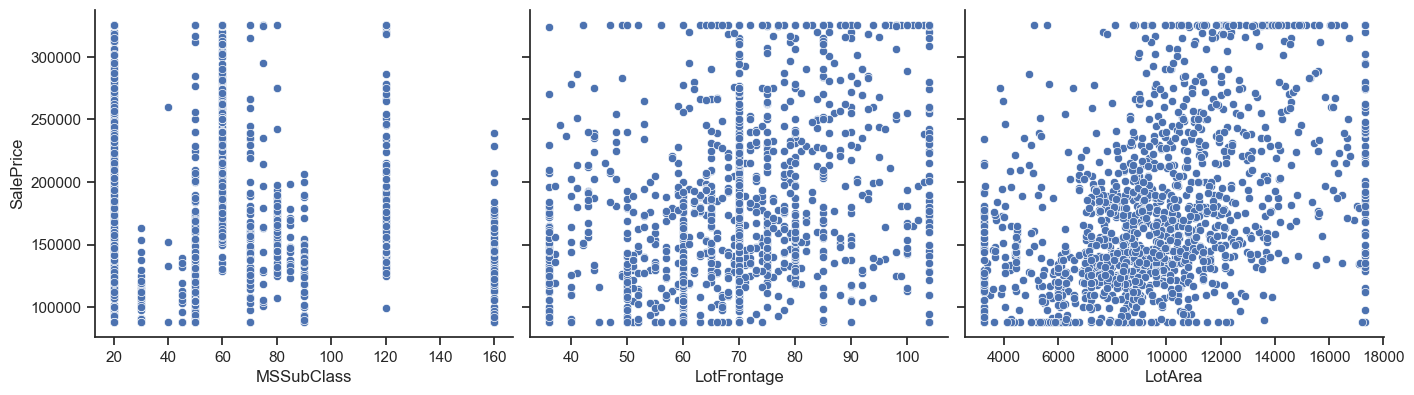

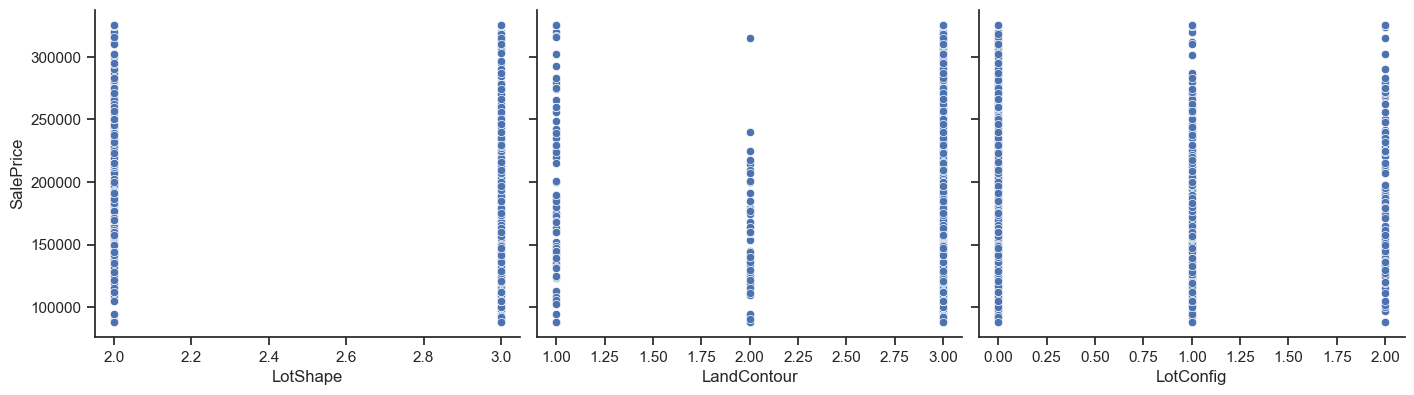

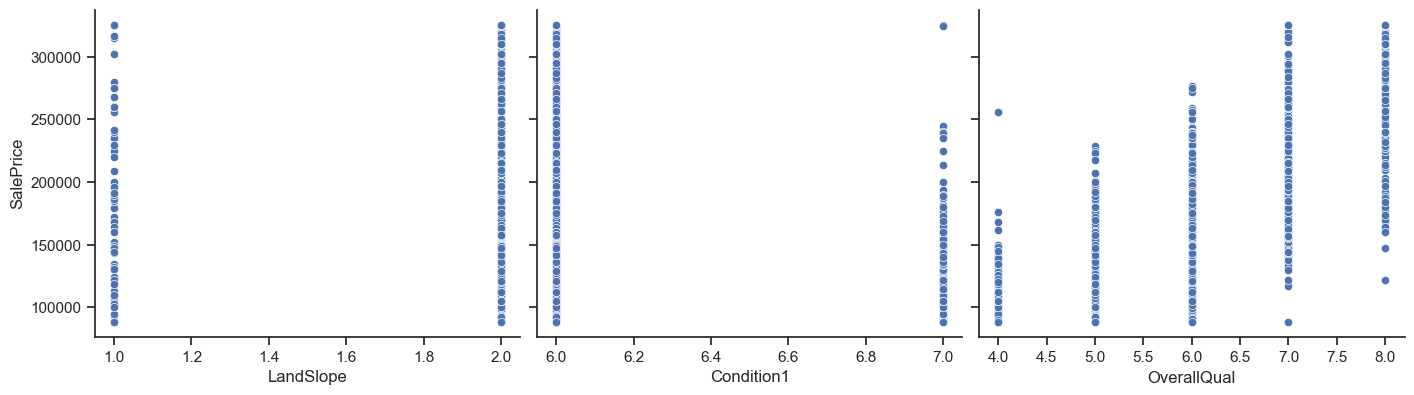

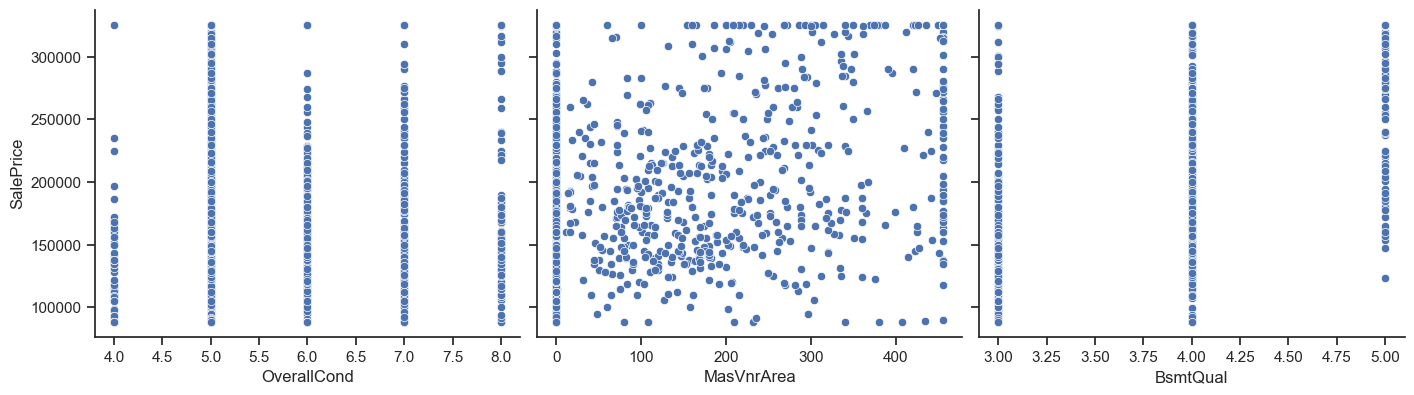

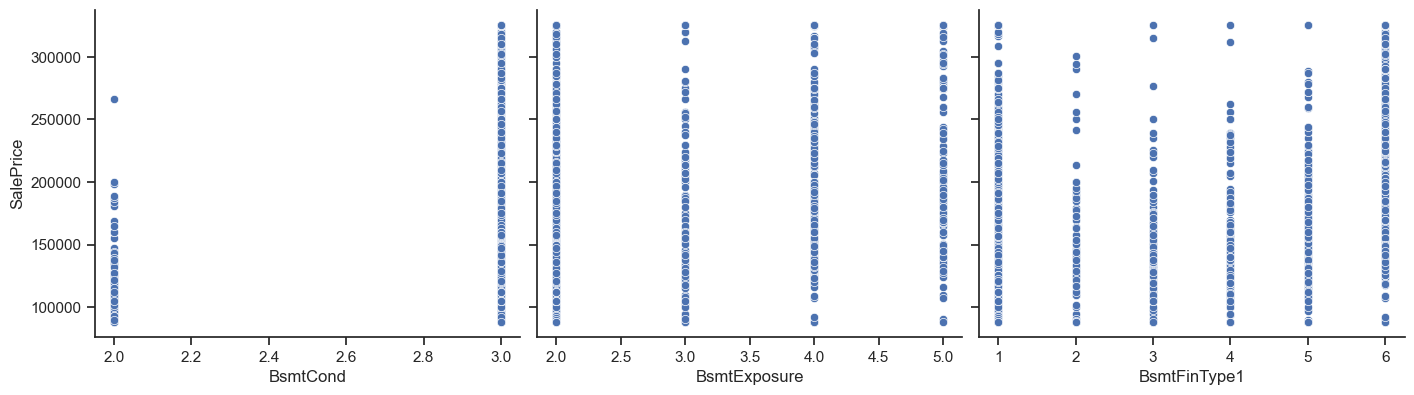

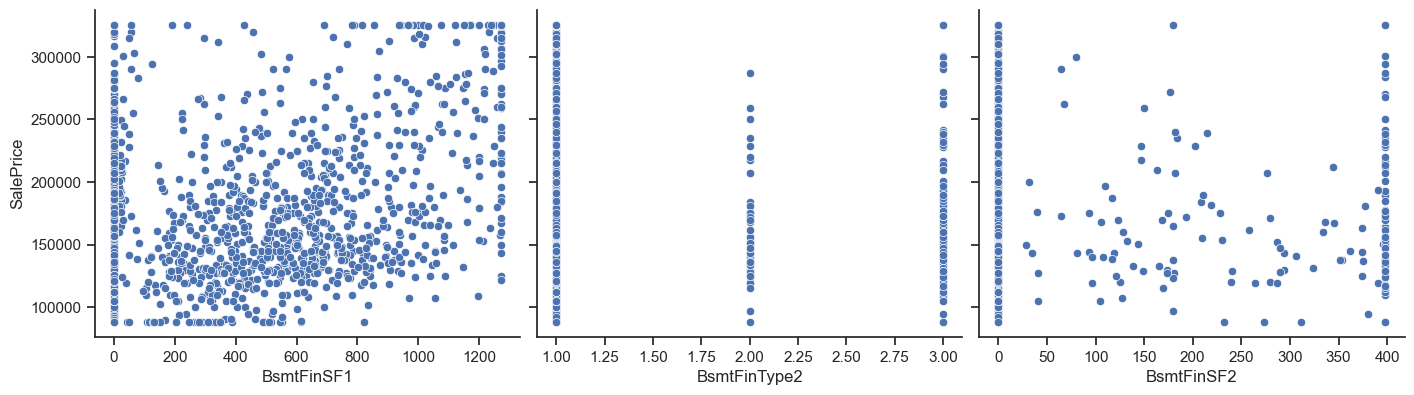

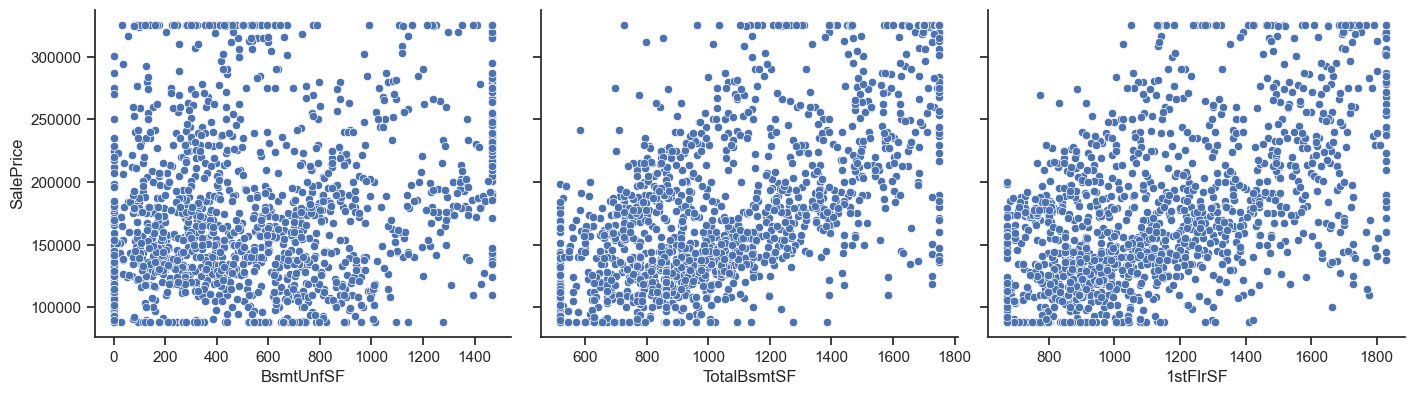

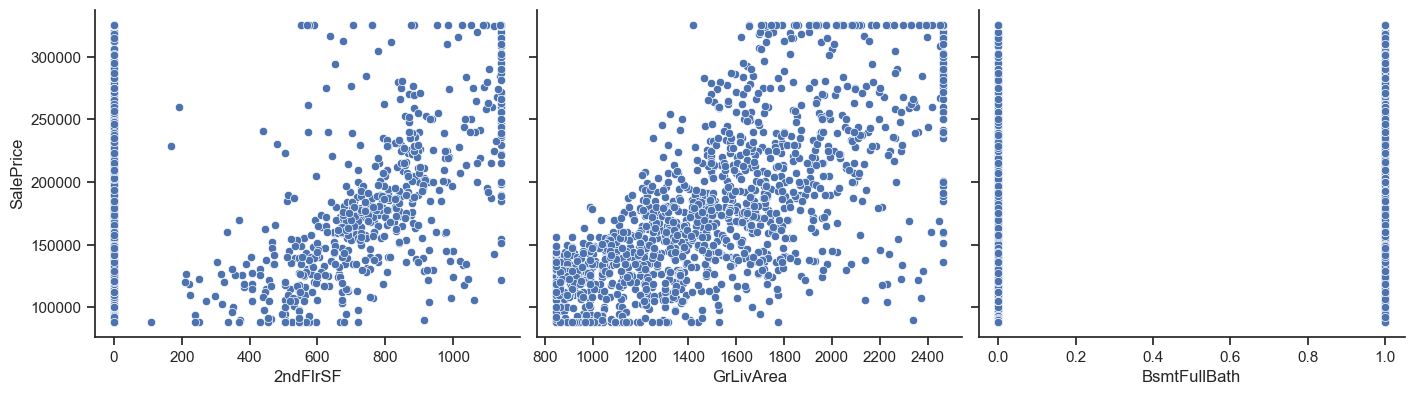

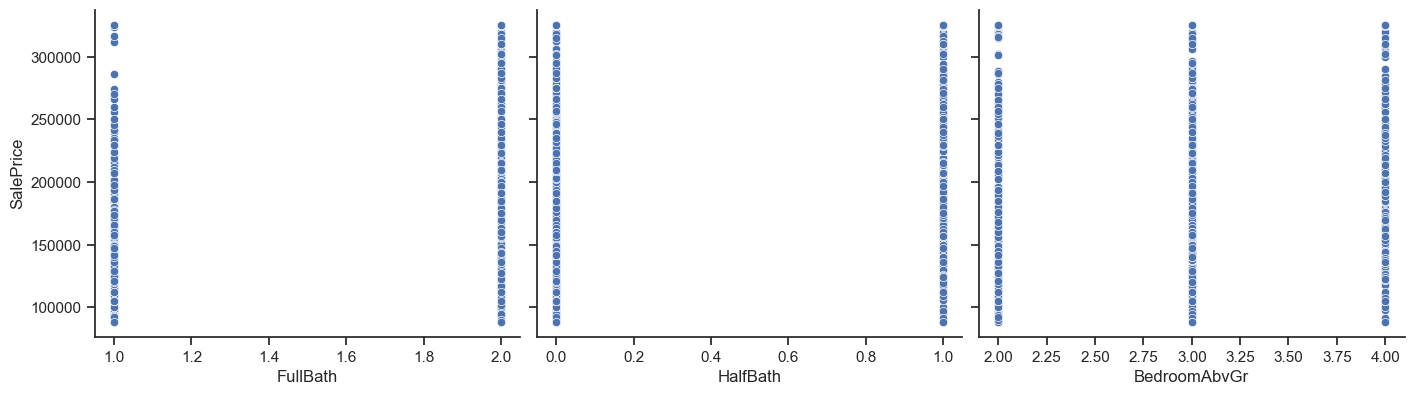

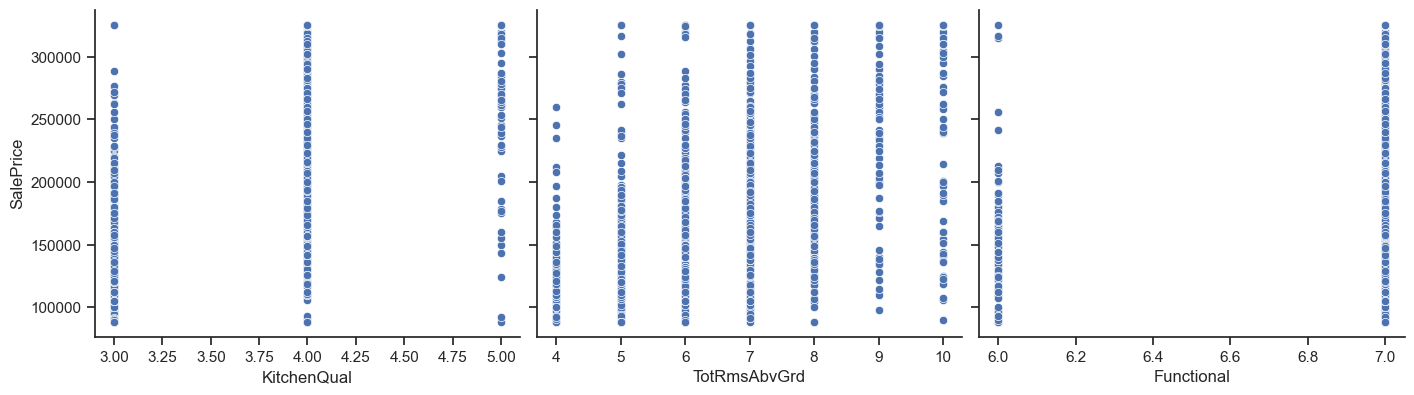

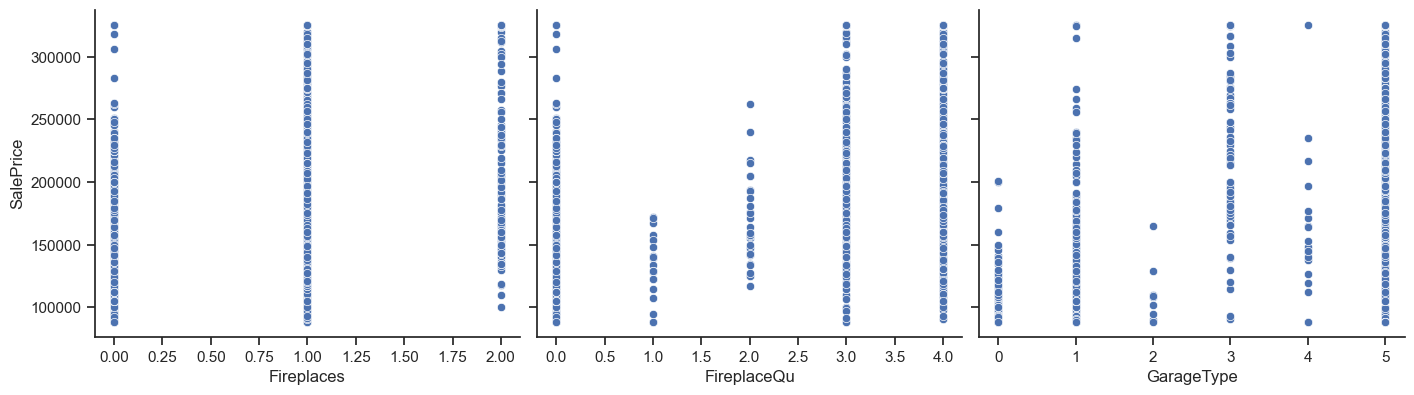

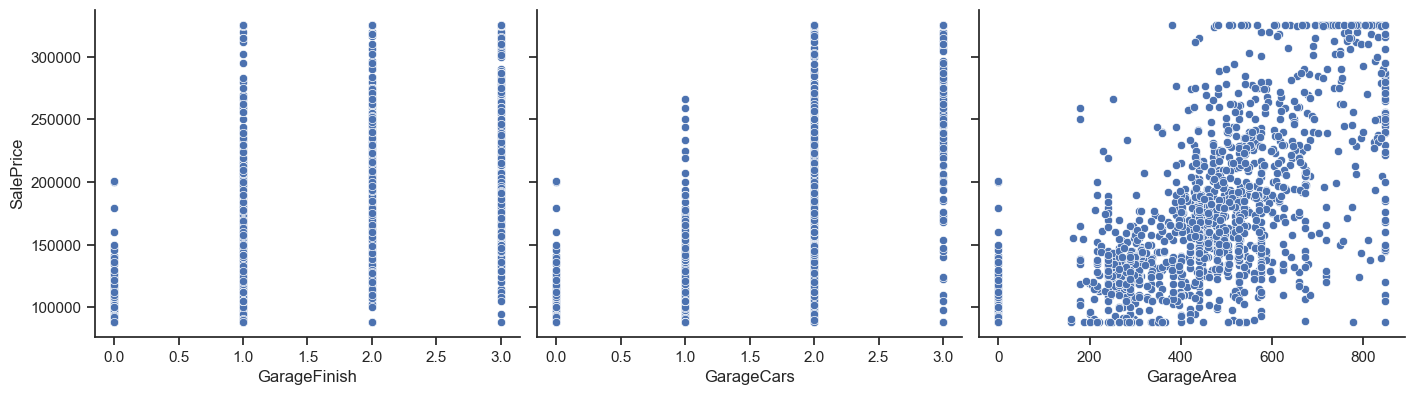

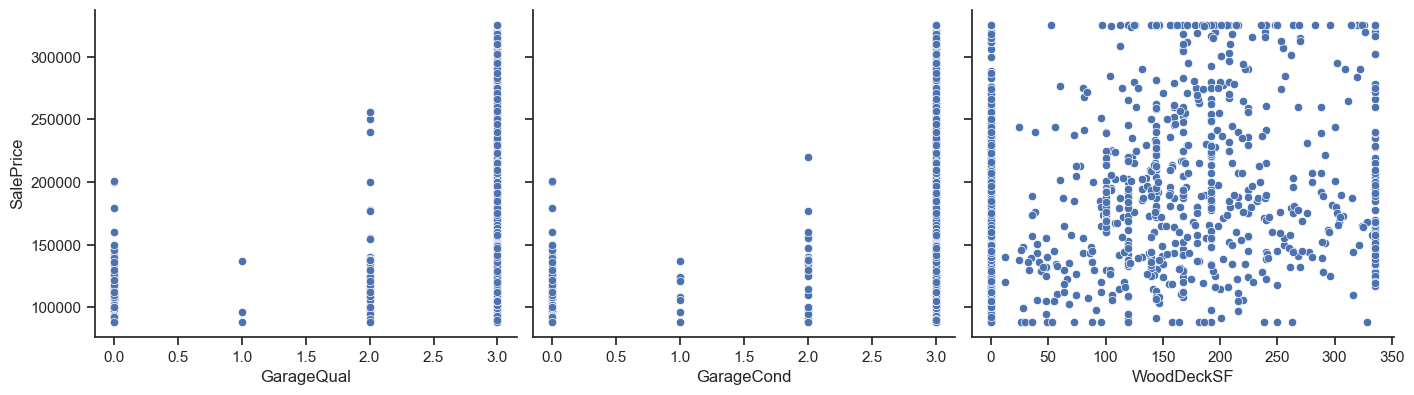

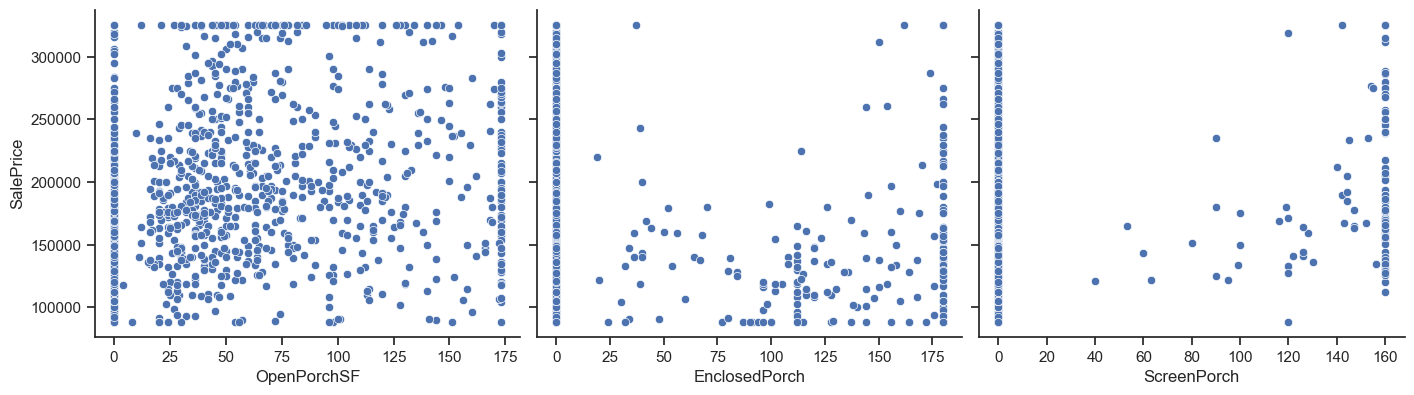

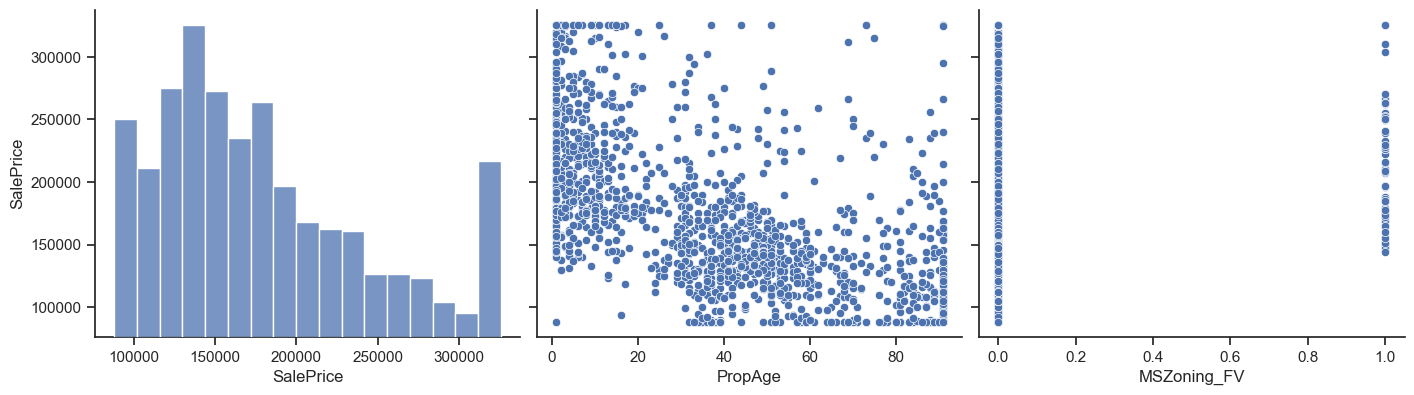

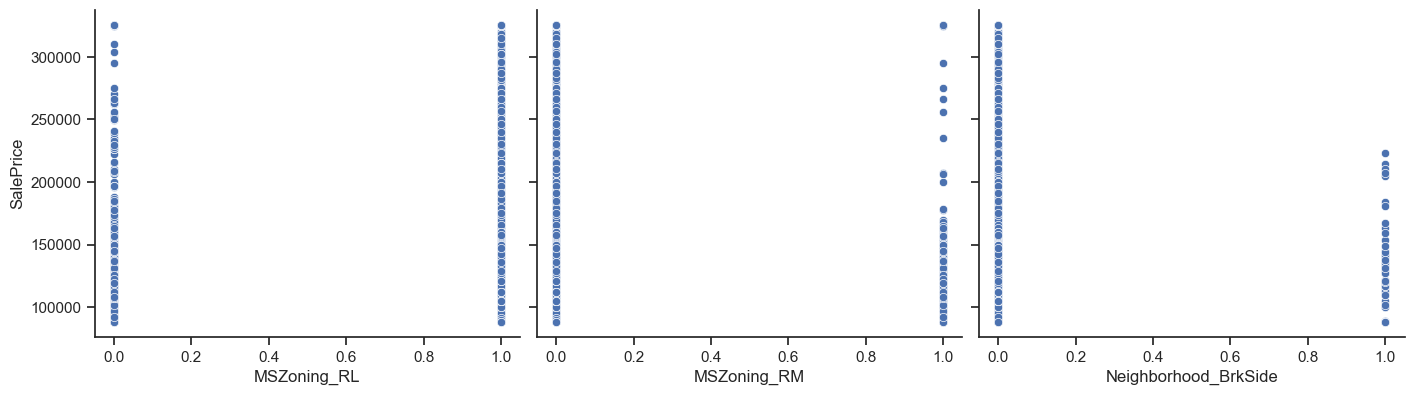

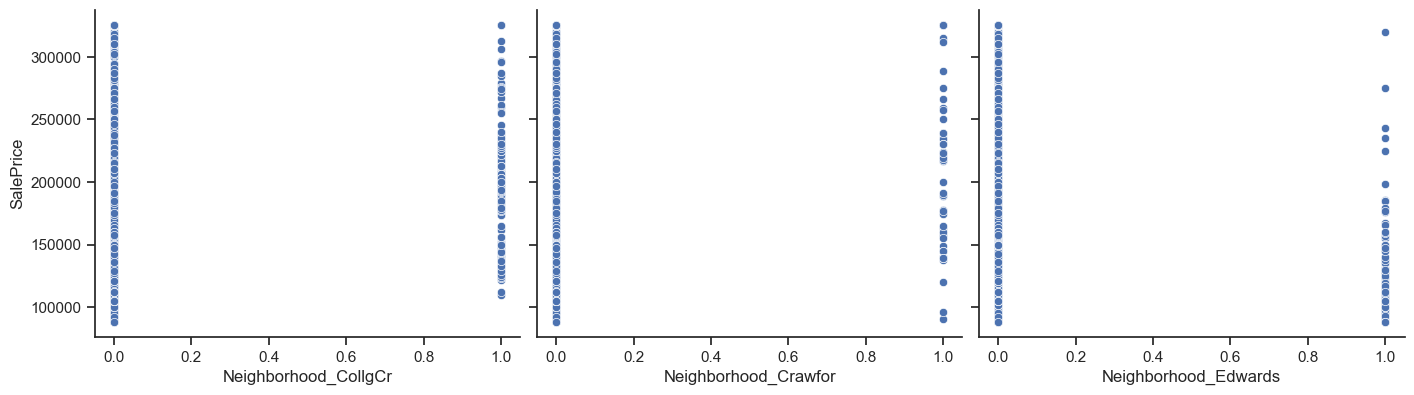

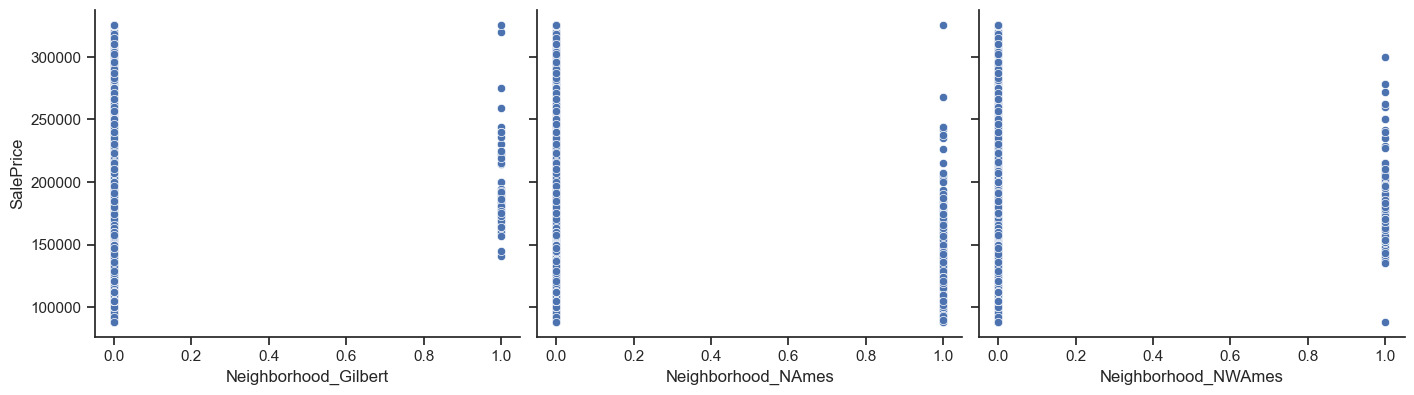

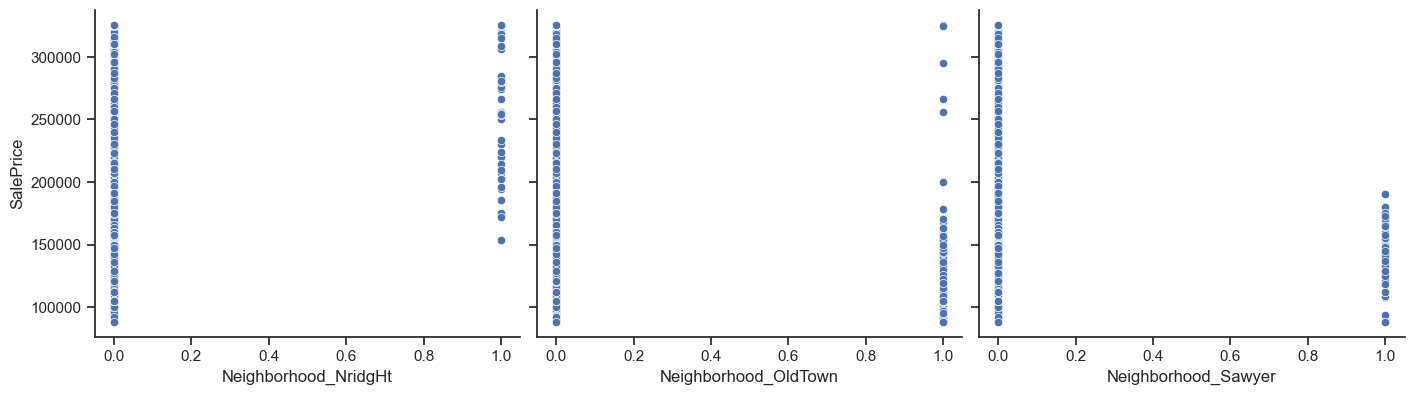

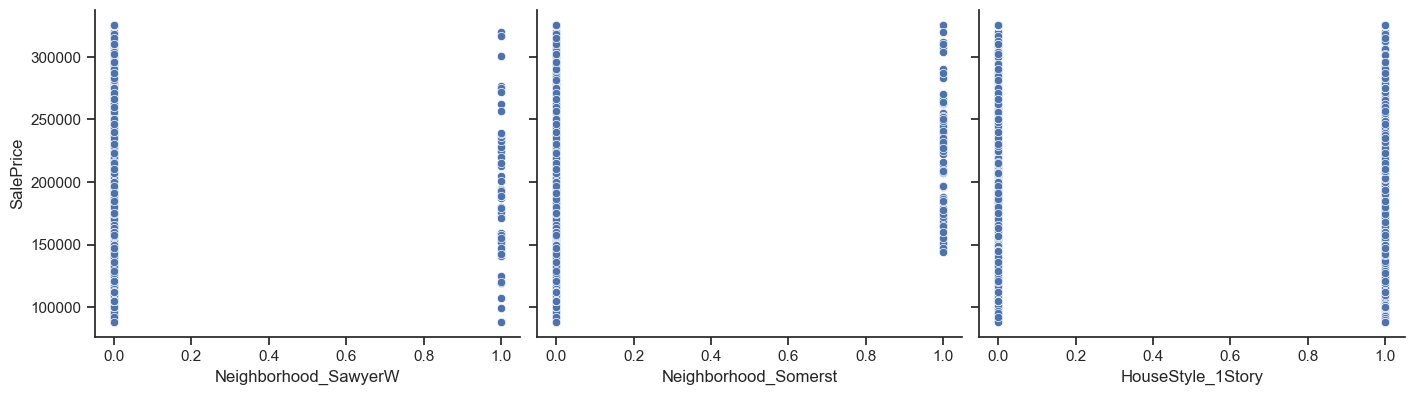

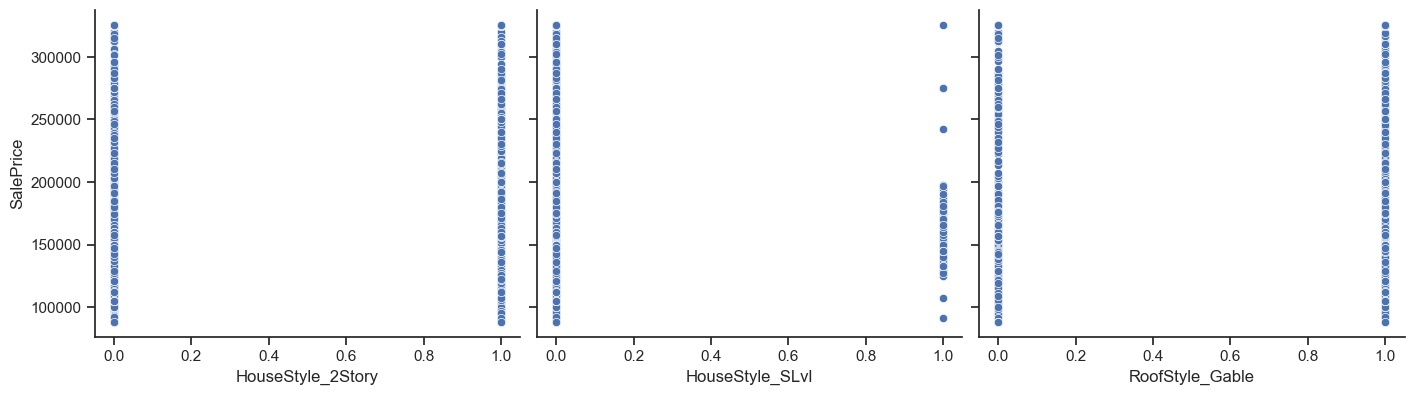

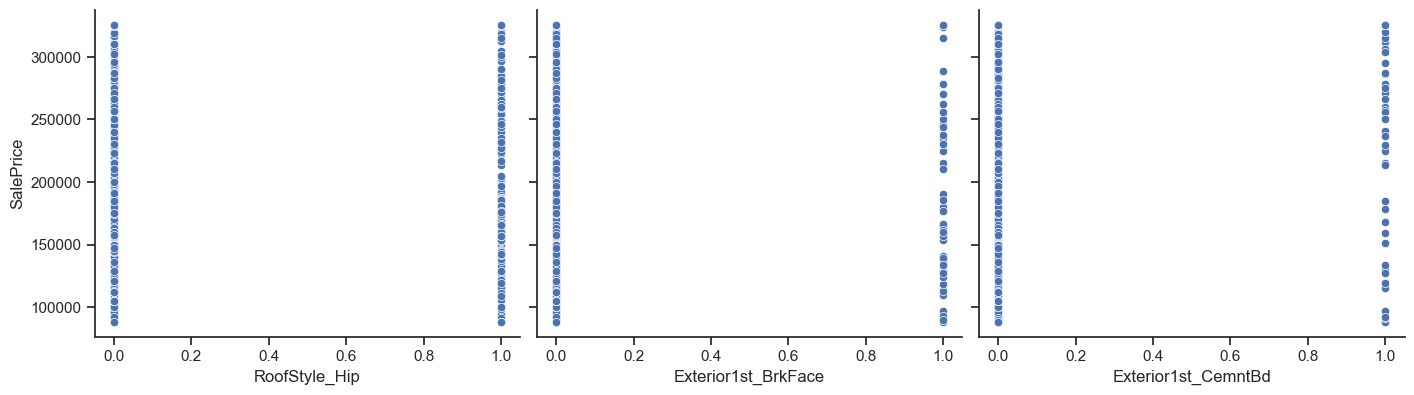

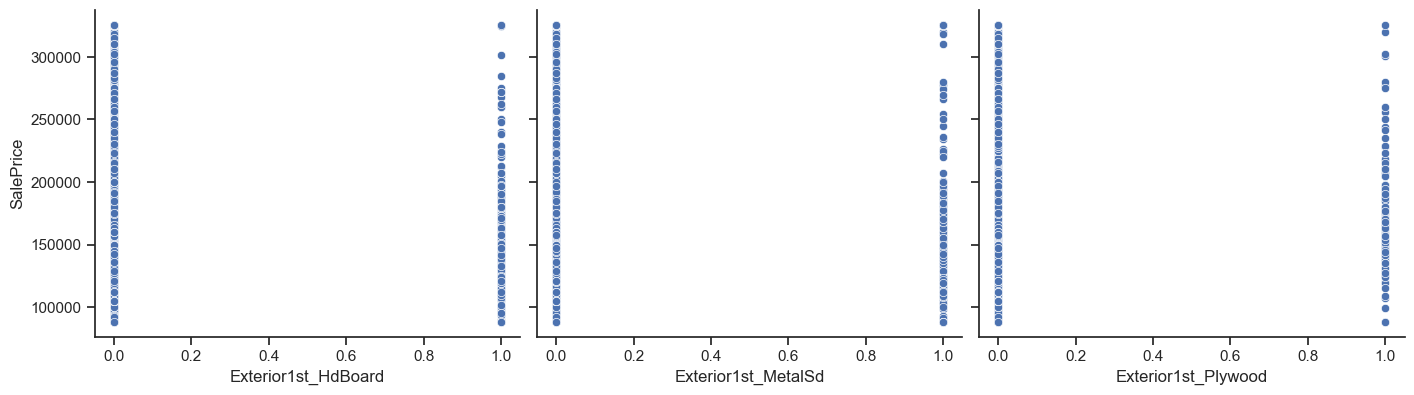

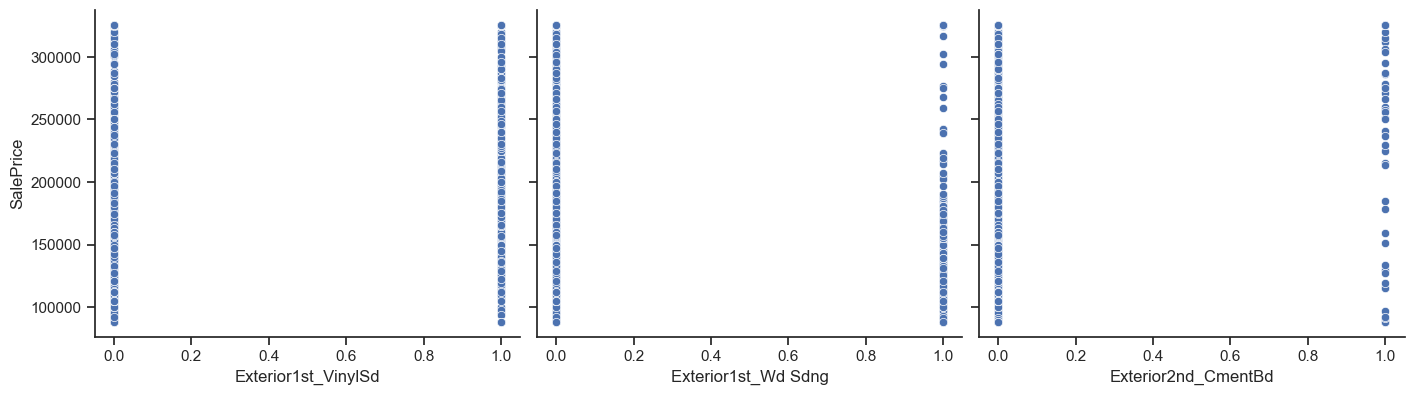

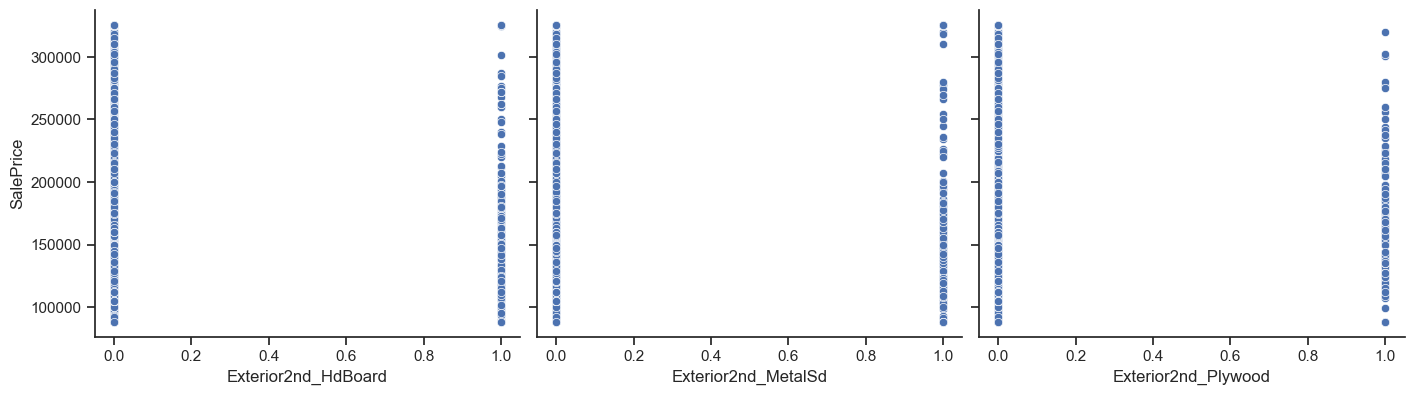

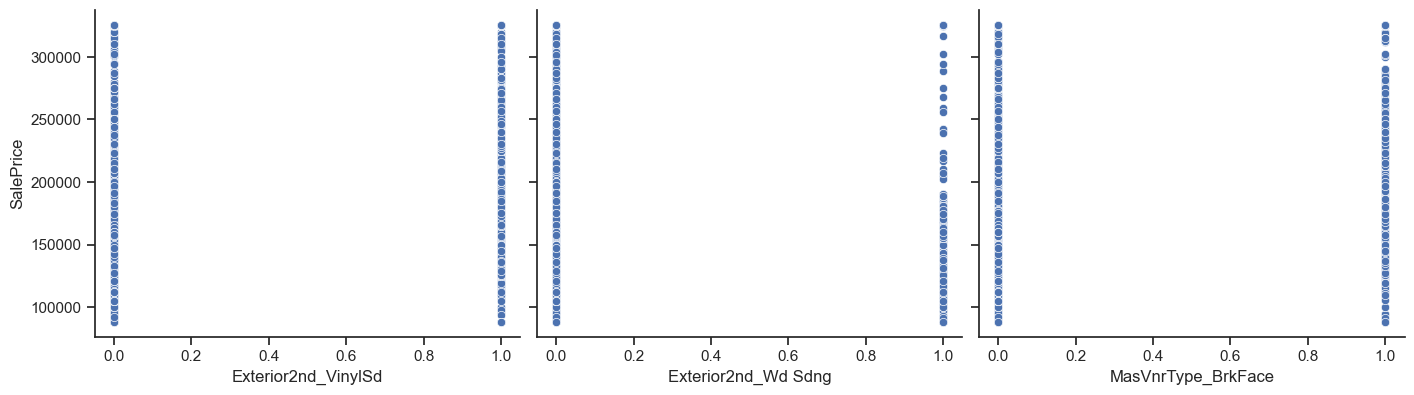

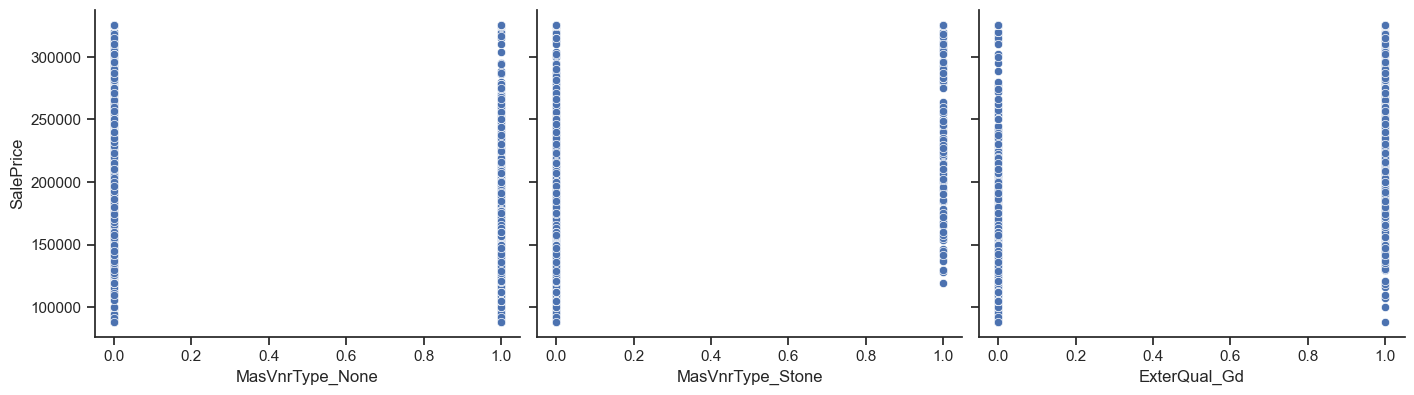

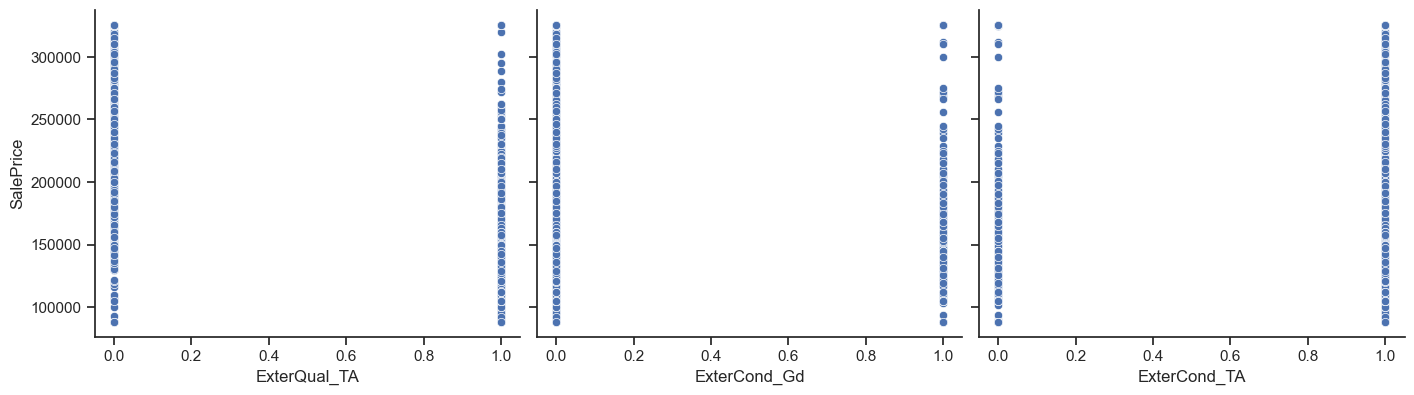

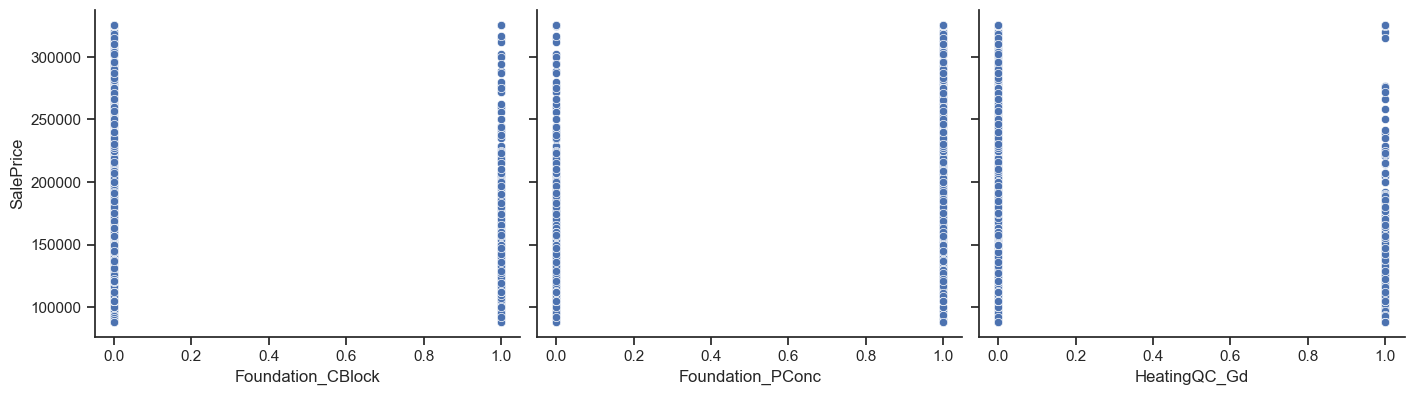

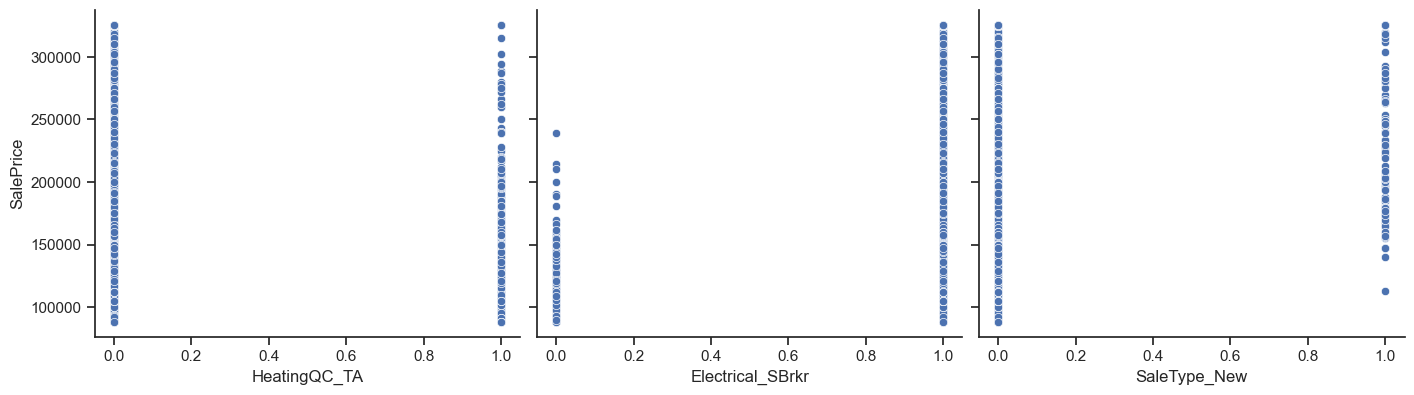

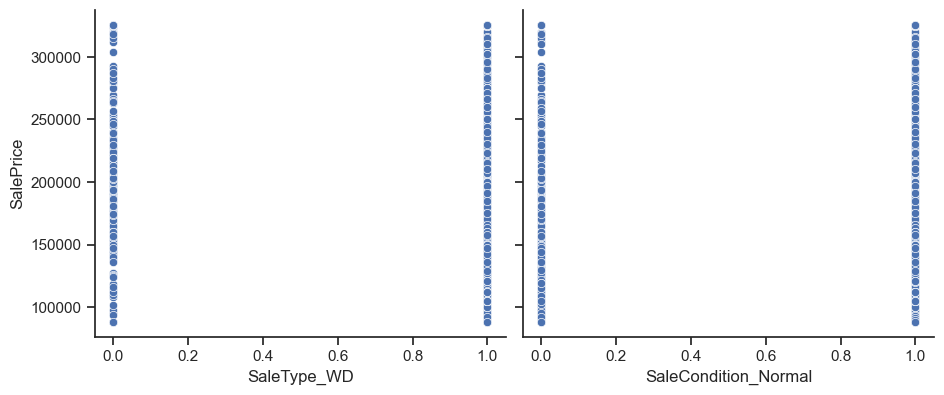

In [1509]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

#### Analyzing the Target 

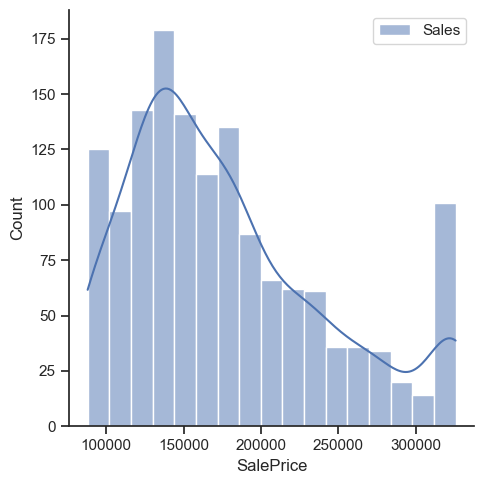

In [1510]:
sns.displot(df.SalePrice, kde=True, label='Sales')
plt.legend()
plt.show()

#### There is a Right Skew on the Target distribution. Taking the Natural Log to normalize the Target's Distribution

In [1511]:
df.SalePrice=np.log(df.SalePrice)

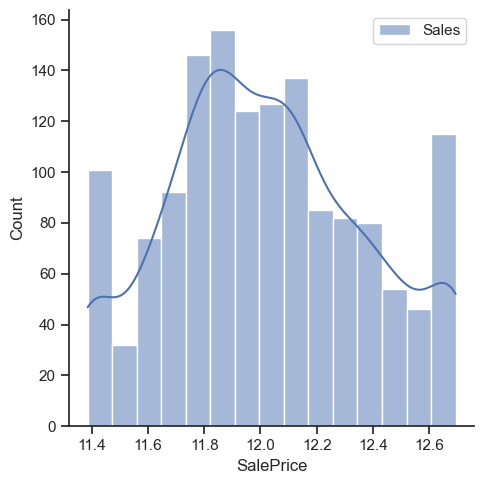

In [1512]:
sns.displot(df.SalePrice, kde=True, label='Sales')
plt.legend()
plt.show()

#### Checking correraltion again to try and reduce weakly correlated features

In [1513]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
dict1=round(correlation_with_target*100,2)
print(len(dict1))
print(dict1)

93
SalePrice                100.00
OverallQual               80.89
GrLivArea                 72.36
GarageCars                68.65
BsmtQual                  66.69
KitchenQual               66.43
GarageArea                66.41
TotalBsmtSF               64.01
GarageFinish              61.47
FullBath                  60.49
1stFlrSF                  60.35
ExterQual_Gd              55.48
FireplaceQu               55.09
Foundation_PConc          54.76
TotRmsAbvGrd              53.32
GarageType                52.08
Fireplaces                50.03
LotArea                   43.74
MasVnrArea                42.91
OpenPorchSF               39.40
LotFrontage               37.56
Exterior1st_VinylSd       35.92
Exterior2nd_VinylSd       35.89
BsmtFinSF1                35.72
WoodDeckSF                35.06
GarageQual                34.82
GarageCond                34.76
Neighborhood_NridgHt      34.00
BsmtExposure              33.26
HalfBath                  33.01
BsmtFinType1              32.44
SaleT

In [1514]:
selected_ids = []

for feature, correlation in dict1.items():
    if -5 <= correlation <= 5:
        selected_ids.append(feature)

# print(selected_ids)

#### Reducing features that have low correlation with target to simplify the model

In [1515]:
df=df.drop(selected_ids,axis=1)

### Creating X and y variables

In [1516]:
#Separating SalePrice and assigning y to it
y= df.pop('SalePrice')
#Assigning X to Features
X=df

### Ceating Train Test Split

In [1517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

### Model Creation

### Linear Regression

In [1518]:
# Instantiate
lm = LinearRegression()

In [1519]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1520]:
print(lm.intercept_)
print(lm.coef_)

10.241072338846676
[-2.56751766e-04  1.41251895e-04  6.15381674e-06 -5.06098745e-03
 -6.41276552e-04  1.24474487e-02 -2.45654092e-02 -4.97273093e-02
  5.13801995e-02  4.82369544e-02 -6.44894090e-05  7.48065894e-03
  5.72320332e-02  8.38037550e-03  4.71527641e-03  3.38295942e-05
 -2.02437930e-05  1.21465080e-04  4.88776957e-05  9.18353776e-05
  2.37828035e-04  1.94422100e-02  5.97222329e-03  1.48442763e-02
  3.80607356e-03  2.76132241e-02 -7.79648121e-03  6.61724900e-02
  3.93404213e-03  8.06133629e-03  7.69166273e-03  9.24676057e-03
  2.34599709e-02  8.26895650e-05 -3.47821068e-03 -7.11217834e-03
  1.05015592e-04  1.34732754e-04  1.08791897e-04  2.47940488e-04
 -1.62663288e-03  5.58791581e-02  2.52398529e-02 -3.65251406e-02
  6.98676243e-02  4.14303542e-03  1.14192340e-01 -4.86563471e-02
  6.23234994e-03 -1.56682501e-02 -3.35237941e-02  6.79739697e-02
 -4.64062326e-04  1.33223787e-03  6.00786780e-02  1.61708715e-02
 -3.68603067e-02 -2.50583107e-02 -1.91255726e-02 -1.12801368e-01
 -3.00

In [1521]:

    y_pred_train = lm.predict(X_train)
    y_pred_test = lm.predict(X_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print(r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print(rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print(mse_test_lr)
    metric.append(mse_test_lr**0.5)

0.9267721201229071
0.909551331940931
9.316438455867338
4.827960695884082
0.009178757099376688
0.011073304348357986


### We can see a good fit with R-Squared score of 92.6 of Train and 90.9 on Test

### Ridge

In [1522]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1523]:
print(model_cv.best_params_)

{'alpha': 8.0}


In [1524]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.68496281e-04  1.83923484e-04  6.10767638e-06 -5.47231856e-03
 -1.98028945e-03  1.04617687e-02 -1.92236254e-02 -4.81502114e-02
  5.26147176e-02  4.88008025e-02 -6.50201370e-05  1.06473304e-02
  4.89794806e-02  8.55718023e-03  4.92626779e-03  3.45696520e-05
 -1.83629625e-05  1.25622029e-04  4.37760594e-05  8.29565348e-05
  2.37907894e-04  1.77852628e-02  5.76731961e-03  1.49733556e-02
  3.41209475e-03  2.54130568e-02 -7.94666455e-03  5.70082527e-02
  2.11748292e-03  9.63118593e-03  7.22481049e-03  9.13122499e-03
  2.30487049e-02  8.34151806e-05 -3.09055098e-03 -6.41398732e-03
  9.98471679e-05  1.37431433e-04  1.00376342e-04  2.50178754e-04
 -1.60181506e-03  4.69328738e-02  1.62219037e-02 -4.11387621e-02
  5.02416094e-02  1.20634225e-03  8.73223446e-02 -4.45032561e-02
  9.50797535e-04 -1.38668378e-02 -2.89286550e-02  5.24673214e-02
 -9.33044436e-03 -1.81612002e-03  4.50371148e-02  1.25383416e-02
 -3.08972819e-02 -9.33391196e-03 -4.46313688e-03 -2.01860524e-02
 -1.88462025e-02  3.70251

In [1525]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9253789038615571
0.9119732086121964
9.493690802601492
4.698685985376322
0.009353389953301962
0.010776802718753033


### We see a good fit with Ridge model with R-squared on the Train at 92.5 and Test at 91.1

### Lasso

In [1526]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1527]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1528]:
model_cv_result_df=pd.DataFrame(model_cv.cv_results_)

In [1529]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [1530]:
lasso.coef_

array([-2.63637315e-04,  1.47584257e-04,  6.24345130e-06, -4.83363850e-03,
       -8.12832718e-04,  1.14112610e-02, -2.06923811e-02, -5.02908585e-02,
        5.18070691e-02,  4.83657367e-02, -7.16783732e-05,  7.92841452e-03,
        5.57395408e-02,  8.84245386e-03,  4.71387042e-03,  3.39008177e-05,
       -1.96891424e-05,  1.23421087e-04,  4.71393984e-05,  8.75151582e-05,
        2.39441827e-04,  1.87809952e-02,  4.47835628e-03,  1.30463097e-02,
        2.85876121e-03,  2.59615771e-02, -7.67970658e-03,  6.52789481e-02,
        1.46344317e-03,  9.04655495e-03,  7.55542918e-03,  8.99052940e-03,
        2.30594763e-02,  8.02246556e-05, -1.17114079e-03, -8.71437819e-03,
        1.04889515e-04,  1.37275155e-04,  1.05188567e-04,  2.55278368e-04,
       -1.69711341e-03,  5.10979051e-02,  1.73363611e-02, -4.32022087e-02,
        6.56726601e-02,  1.51410929e-03,  1.12283916e-01, -4.52090011e-02,
        1.48162728e-03, -1.19644319e-02, -2.93711293e-02,  6.28291217e-02,
       -0.00000000e+00, -

In [1531]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9262148813393088
0.9110010401856254
9.387333323250214
4.750578302355485
0.009248604259359817
0.010895821794393313


### We see a good fit with Lasso model with R-squared on the Train at 92.6 and Test at 91.1

In [1532]:
beta = pd.DataFrame(index=X_train.columns)
beta.rows = X_train.columns
beta

Empty DataFrame
Columns: []
Index: [MSSubClass, LotFrontage, LotArea, LotShape, LandContour, LotConfig, LandSlope, Condition1, OverallQual, OverallCond, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, PropAge, MSZoning_FV, MSZoning_RL, MSZoning_RM, Neighborhood_BrkSide, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_NAmes, Neighborhood_NWAmes, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_Sawyer, Neighborhood_Somerst, HouseStyle_1Story, HouseStyle_2Story, RoofStyle_Gable, RoofStyle_Hip, Exterior1st_CemntBd, Exterior1st_HdBoard, Exterior1st_MetalSd, Exterior1st_VinylSd, Exterior1st_Wd Sdng, Exterior2nd_CmentBd, Exterior2nd_HdBoard, Exterior2nd_MetalSd, Exterior2nd_VinylSd, Exterior2nd_Wd Sdng, MasVnrType_BrkFace, MasVnrType_None, MasVnrType_Stone, ExterQual_Gd, ExterQual_TA, ExterCond_Gd, ExterCond_TA, Foundation_CBlock, Foundation_PConc, HeatingQC_Gd, HeatingQC_TA, Electrical_SBrkr, SaleType_New, SaleType_WD, SaleCondition_Normal, SaleCondition_Partial]

In [1533]:
beta['Ridge'] = ridge.coef_
beta['Lasso'] = lasso.coef_

In [1534]:
beta

Ridge     Lasso
MSSubClass            -0.000268 -0.000264
LotFrontage            0.000184  0.000148
LotArea                0.000006  0.000006
LotShape              -0.005472 -0.004834
LandContour           -0.001980 -0.000813
LotConfig              0.010462  0.011411
LandSlope             -0.019224 -0.020692
Condition1            -0.048150 -0.050291
OverallQual            0.052615  0.051807
OverallCond            0.048801  0.048366
MasVnrArea            -0.000065 -0.000072
BsmtQual               0.010647  0.007928
BsmtCond               0.048979  0.055740
BsmtExposure           0.008557  0.008842
BsmtFinType1           0.004926  0.004714
BsmtFinSF1             0.000035  0.000034
BsmtUnfSF             -0.000018 -0.000020
TotalBsmtSF            0.000126  0.000123
1stFlrSF               0.000044  0.000047
2ndFlrSF               0.000083  0.000088
GrLivArea              0.000238  0.000239
BsmtFullBath           0.017785  0.018781
FullBath               0.005767  0.004478
HalfBath               0.014973  0.013046
BedroomAbvGr           0.003412  0.002859
KitchenQual            0.025413  0.025962
TotRmsAbvGrd          -0.007947 -0.007680
Functional             0.057008  0.065279
Fireplaces             0.002117  0.001463
FireplaceQu            0.009631  0.009047
GarageType             0.007225  0.007555
GarageFinish           0.009131  0.008991
GarageCars             0.023049  0.023059
GarageArea             0.000083  0.000080
GarageQual            -0.003091 -0.001171
GarageCond            -0.006414 -0.008714
WoodDeckSF             0.000100  0.000105
OpenPorchSF            0.000137  0.000137
EnclosedPorch          0.000100  0.000105
ScreenPorch            0.000250  0.000255
PropAge               -0.001602 -0.001697
MSZoning_FV            0.046933  0.051098
MSZoning_RL            0.016222  0.017336
MSZoning_RM           -0.041139 -0.043202
Neighborhood_BrkSide   0.050242  0.065673
Neighborhood_CollgCr   0.001206  0.001514
Neighborhood_Crawfor   0.087322  0.112284
Neighborhood_Edwards  -0.044503 -0.045209
Neighborhood_Gilbert   0.000951  0.001482
Neighborhood_NAmes    -0.013867 -0.011964
Neighborhood_NWAmes   -0.028929 -0.029371
Neighborhood_NridgHt   0.052467  0.062829
Neighborhood_OldTown  -0.009330 -0.000000
Neighborhood_Sawyer   -0.001816 -0.000000
Neighborhood_Somerst   0.045037  0.052134
HouseStyle_1Story      0.012538  0.012565
HouseStyle_2Story     -0.030897 -0.033601
RoofStyle_Gable       -0.009334 -0.008865
RoofStyle_Hip         -0.004463 -0.003132
Exterior1st_CemntBd   -0.020186 -0.027837
Exterior1st_HdBoard   -0.018846 -0.021122
Exterior1st_MetalSd    0.003703  0.000806
Exterior1st_VinylSd    0.013364  0.007653
Exterior1st_Wd Sdng   -0.036981 -0.050379
Exterior2nd_CmentBd   -0.003544  0.000000
Exterior2nd_HdBoard    0.001096  0.001753
Exterior2nd_MetalSd    0.001034  0.000000
Exterior2nd_VinylSd   -0.003517 -0.000000
Exterior2nd_Wd Sdng    0.027541  0.039508
MasVnrType_BrkFace     0.022520  0.027449
MasVnrType_None        0.006651  0.009942
MasVnrType_Stone       0.017624  0.020730
ExterQual_Gd           0.015576  0.016187
ExterQual_TA           0.004356  0.005214
ExterCond_Gd          -0.024399 -0.033620
ExterCond_TA          -0.007342 -0.015347
Foundation_CBlock      0.002850  0.005561
Foundation_PConc       0.026317  0.028565
HeatingQC_Gd          -0.010012 -0.009410
HeatingQC_TA          -0.016479 -0.016074
Electrical_SBrkr      -0.006316 -0.005700
SaleType_New           0.049516  0.123127
SaleType_WD            0.006488  0.008424
SaleCondition_Normal   0.041300  0.045454
SaleCondition_Partial  0.006977 -0.057896

In [1535]:
beta[beta['Lasso']==0]

Ridge  Lasso
Neighborhood_OldTown -0.009330   -0.0
Neighborhood_Sawyer  -0.001816   -0.0
Exterior2nd_CmentBd  -0.003544    0.0
Exterior2nd_MetalSd   0.001034    0.0
Exterior2nd_VinylSd  -0.003517   -0.0

In [1536]:
beta.loc[beta['Lasso']!=0, 'Lasso']

MSSubClass              -0.000264
LotFrontage              0.000148
LotArea                  0.000006
LotShape                -0.004834
LandContour             -0.000813
LotConfig                0.011411
LandSlope               -0.020692
Condition1              -0.050291
OverallQual              0.051807
OverallCond              0.048366
MasVnrArea              -0.000072
BsmtQual                 0.007928
BsmtCond                 0.055740
BsmtExposure             0.008842
BsmtFinType1             0.004714
BsmtFinSF1               0.000034
BsmtUnfSF               -0.000020
TotalBsmtSF              0.000123
1stFlrSF                 0.000047
2ndFlrSF                 0.000088
GrLivArea                0.000239
BsmtFullBath             0.018781
FullBath                 0.004478
HalfBath                 0.013046
BedroomAbvGr             0.002859
KitchenQual              0.025962
TotRmsAbvGrd            -0.007680
Functional               0.065279
Fireplaces               0.001463
FireplaceQu   

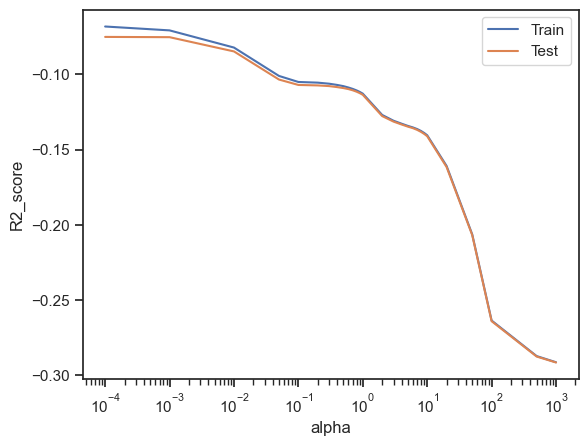

In [1537]:
plt.plot(model_cv_result_df['param_alpha'], model_cv_result_df['mean_train_score'], label='Train')
plt.plot(model_cv_result_df['param_alpha'], model_cv_result_df['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### We have a final model with a good fit

In [1538]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.926772          0.925379          0.926215
1   R2 Score (Test)           0.909551          0.911973          0.911001
2       RSS (Train)           9.316438          9.493691          9.387333
3        RSS (Test)           4.827961          4.698686          4.750578
4       MSE (Train)           0.095806          0.096713          0.096170
5        MSE (Test)           0.105230          0.103811          0.104383

In [1539]:
betas = pd.DataFrame(index=X.columns)

In [1540]:
betas.rows = X.columns

In [1541]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1542]:
betas.head(15)

Linear     Ridge     Lasso
MSSubClass   -0.000257 -0.000268 -0.000264
LotFrontage   0.000141  0.000184  0.000148
LotArea       0.000006  0.000006  0.000006
LotShape     -0.005061 -0.005472 -0.004834
LandContour  -0.000641 -0.001980 -0.000813
LotConfig     0.012447  0.010462  0.011411
LandSlope    -0.024565 -0.019224 -0.020692
Condition1   -0.049727 -0.048150 -0.050291
OverallQual   0.051380  0.052615  0.051807
OverallCond   0.048237  0.048801  0.048366
MasVnrArea   -0.000064 -0.000065 -0.000072
BsmtQual      0.007481  0.010647  0.007928
BsmtCond      0.057232  0.048979  0.055740
BsmtExposure  0.008380  0.008557  0.008842
BsmtFinType1  0.004715  0.004926  0.004714